In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import tensorflow.keras as keras
from folium.plugins import HeatMap
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.preprocessing import FunctionTransformer
from sklearn.neural_network import MLPRegressor
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import History
from keras.optimizers import Adam

In [3]:
data = pd.read_csv("C:/Users/navab/OneDrive/Documents/masterclass/train_data.csv")
#C:\Users\navab\OneDrive\Documents\masterclass

In [4]:
data_cleaned = data[data['city'].str.contains('NYC', case=False, na=False)]

# Save the filtered data to a new CSV file called data_cleaned.csv
data_cleaned.to_csv('data_cleaned.csv', index=False)

In [5]:
#data_cleaned['Price'] = np.exp(data_cleaned['log_price'])

In [6]:
data_cleaned=data_cleaned.drop("first_review",axis='columns')

In [7]:
data_cleaned=data_cleaned.drop("host_response_rate",axis='columns')

In [8]:
data_cleaned=data_cleaned.drop("review_scores_rating",axis='columns')

In [9]:
data_cleaned=data_cleaned.drop("last_review",axis='columns')

In [10]:
data_cleaned=data_cleaned.drop("thumbnail_url",axis='columns')

## For travel time columns : 'avg_lead_time','min_lead_time','min_airport_time', 'avg_airport_time','man_time','bro_time','que_time','bnx_time', 'sta_time','nj_time'
                        
# Read data from CSV file
data = pd.read_csv("C:/Users/navab/Downloads/train.csv")
data_cleaned = data[data['city'].str.contains('NYC', case=False, na=False)]
 
# Save the filtered data to a new CSV file called data_cleaned.csv
#data_cleaned.to_csv('data_cleaned.csv', index=False)
 
lat_airbnb = data_cleaned['latitude'].tolist()
long_airbnb = data_cleaned['longitude'].tolist()
 
def traveltime(lat, long):
    url = f"http://127.0.0.1:5000/route/v1/driving/{long},{lat};-73.8718,40.7733?steps=true"
    #40.7733, -73.8718  
    response = requests.get(url)
    if response.status_code == 200:
        duration = response.json()['routes'][0]['duration']
        return duration
    else:
        print("Error fetching travel time:", response.text)
        return None
 
# Save results to Excel file
file_path = "C:/Users/navab/OneDrive/Documents/masterclass/airports.xlsx"
 
# Check if the Excel file exists, if not create it with the first row for headers
if not os.path.exists(file_path):
    with pd.ExcelWriter(file_path, engine='openpyxl', mode='w') as writer:
        pd.DataFrame(columns=['start_latitude', 'start_longitude', 'end_latitude', 'end_longitude', 'avg_travel_time', 'min_travel_time']).to_excel(writer, sheet_name='Sheet1', index=False)
 
# Loop through each Airbnb location, calculate travel times, and append to the excel sheet in Excel file
with pd.ExcelWriter(file_path, engine='openpyxl', mode='a') as writer:
    # Load the workbook
    workbook = writer.book
    # Check if the sheet already exists
    sheet_name = 'LaGuardia Airport'
    if sheet_name in workbook.sheetnames:
        worksheet = workbook[sheet_name]
    else:
        worksheet = workbook.create_sheet(sheet_name)
        # Write column headers if the sheet is newly created
        headers = ['start_latitude', 'start_longitude', 'end_latitude', 'end_longitude', 'avg_travel_time', 'min_travel_time']
        worksheet.append(headers)
 
    for lat, long in zip(lat_airbnb, long_airbnb):
        # Calculate travel times
        avg_time = traveltime(lat, long)
        min_time = traveltime(lat, long)
       
        # Append data to the sheet
        data_row = [lat, long, 40.5031, -74.2533 , avg_time, min_time]
        worksheet.append(data_row)
 
# Print confirmation
print("Travel times saved to Excel file.")

# For a new column Borough
 
#longlat = pd.read_csv("longlat.csv",encoding = 'utf-8', sep = '\t')
geolocator = geopy.Nominatim(user_agent="check_1")
 
def get_zip_code(x):
    location = geolocator.reverse("{}, {}".format(x['latitude'],x['longitude']))
    return location.raw['address']['postcode']
appended_df['zipcode_new'] = appended_df.apply(lambda x: get_zip_code(x), axis = 1)
print(appended_df.head())

In [11]:
# Replace null values with median in specific columns
columns_to_fill = ['bathrooms', 'bedrooms', 'beds']  # Specify columns you want to fill null values for
for column in columns_to_fill:
    median_value = data_cleaned[column].median()  # Calculate median for the column
    data_cleaned[column].fillna(median_value, inplace=True)  # Replace null values with median

In [12]:
#Appending the amenities to list l
l=list(data_cleaned['amenities'])
# splitting the list of amenities in a individual rows into list of lists
l=[[word.strip('[" ]') for word in row[1:-1].split(',')] for row in l]
#creating a new column 'amenities_lists' and then assiging the previous l to amenities_lists.
data_cleaned['amenities_lists'] = l
all_amenities = [item.strip('[" ]') for sublist in l for item in sublist]
# Count the frequency of each unique amenity
amenity_counts = pd.Series(all_amenities).value_counts()
# Calculate the percentage of occurrence of each amenity
amenity_percentages = (amenity_counts / len(data_cleaned)) * 100
# Output the frequency and percentage of each amenity
print(amenity_counts)
print(len(amenity_percentages))

Wireless Internet            31304
Kitchen                      30068
Heating                      29523
Essentials                   27561
Air conditioning             27159
                             ...  
Air purifier                    12
Washer / Dryer                  11
Lake access                     11
Ski in/Ski out                   6
Roll-in shower with chair        1
Name: count, Length: 117, dtype: int64
117


In [13]:
# Convert list of amenities to string
data_cleaned['amenities_lists'] = data_cleaned['amenities_lists'].apply(lambda x: ','.join(x))

# Split the string into separate columns
amenities_df = data_cleaned['amenities_lists'].str.get_dummies(sep=',')

# Concatenate the new columns with the original DataFrame
data_cleaned = pd.concat([data_cleaned, amenities_df], axis=1)

# Drop the original 'amenities_lists' column
data_cleaned.drop(columns=['amenities_lists'], inplace=True)

In [14]:
dummy_df=data_cleaned.copy()

In [15]:
columns_to_drop = ['id', 'accommodates','log_price','room_type','amenities','property_type','bathrooms','bed_type',
                   'cancellation_policy','cleaning_fee','city','description','host_has_profile_pic','host_identity_verified',
                  'host_since','instant_bookable','latitude','longitude','name','neighbourhood','number_of_reviews',
                   'beds','Borough','bedrooms','zipcode']

# Drop the specified columns
dummy_df.drop(columns=columns_to_drop, inplace=True)

In [16]:
new_data = pd.read_excel('C:/Users/navab/OneDrive/Documents/masterclass/append.xlsx')

# EDA 

C:\Users\navab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\navab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\navab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\navab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

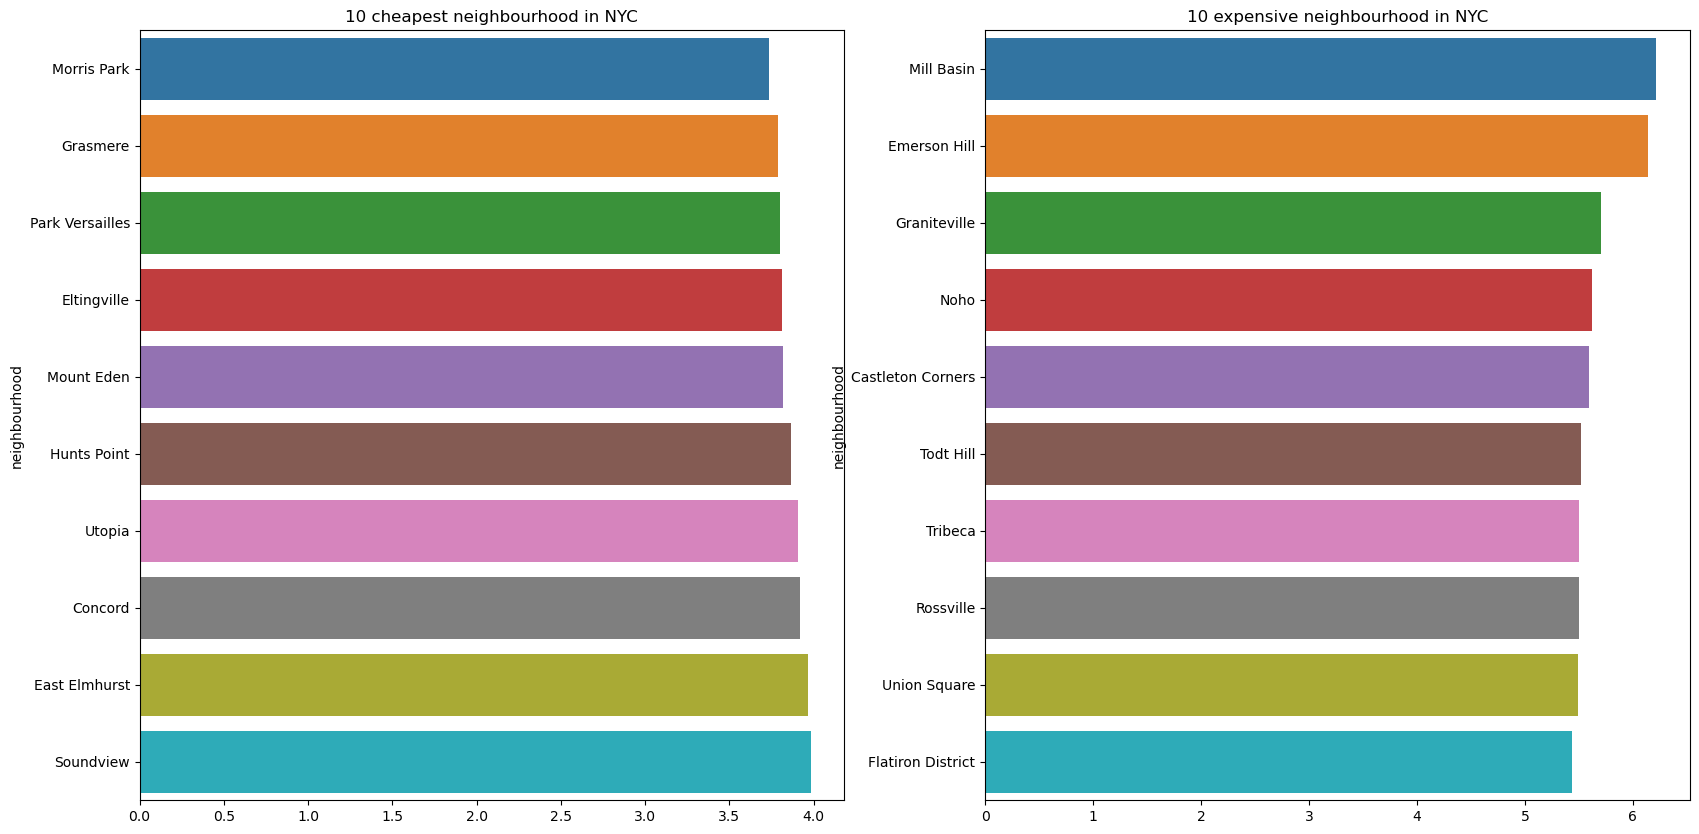

In [17]:
#Top 10 expensive & Cheapest neighbourhood in NYC
a = data_cleaned.groupby('neighbourhood')['log_price'].mean().sort_values(ascending=True).head(10)
b = data_cleaned.groupby('neighbourhood')['log_price'].mean().sort_values(ascending=False).head(10)
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(121)
sns.barplot(y=a.index, x=a.values, ax=ax1)
ax1.set_title('10 cheapest neighbourhood in NYC')
ax2 = fig.add_subplot(122)
sns.barplot(y=b.index, x=b.values, ax=ax2)
ax2.set_title('10 expensive neighbourhood in NYC')
plt.show()

C:\Users\navab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\navab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\navab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\navab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

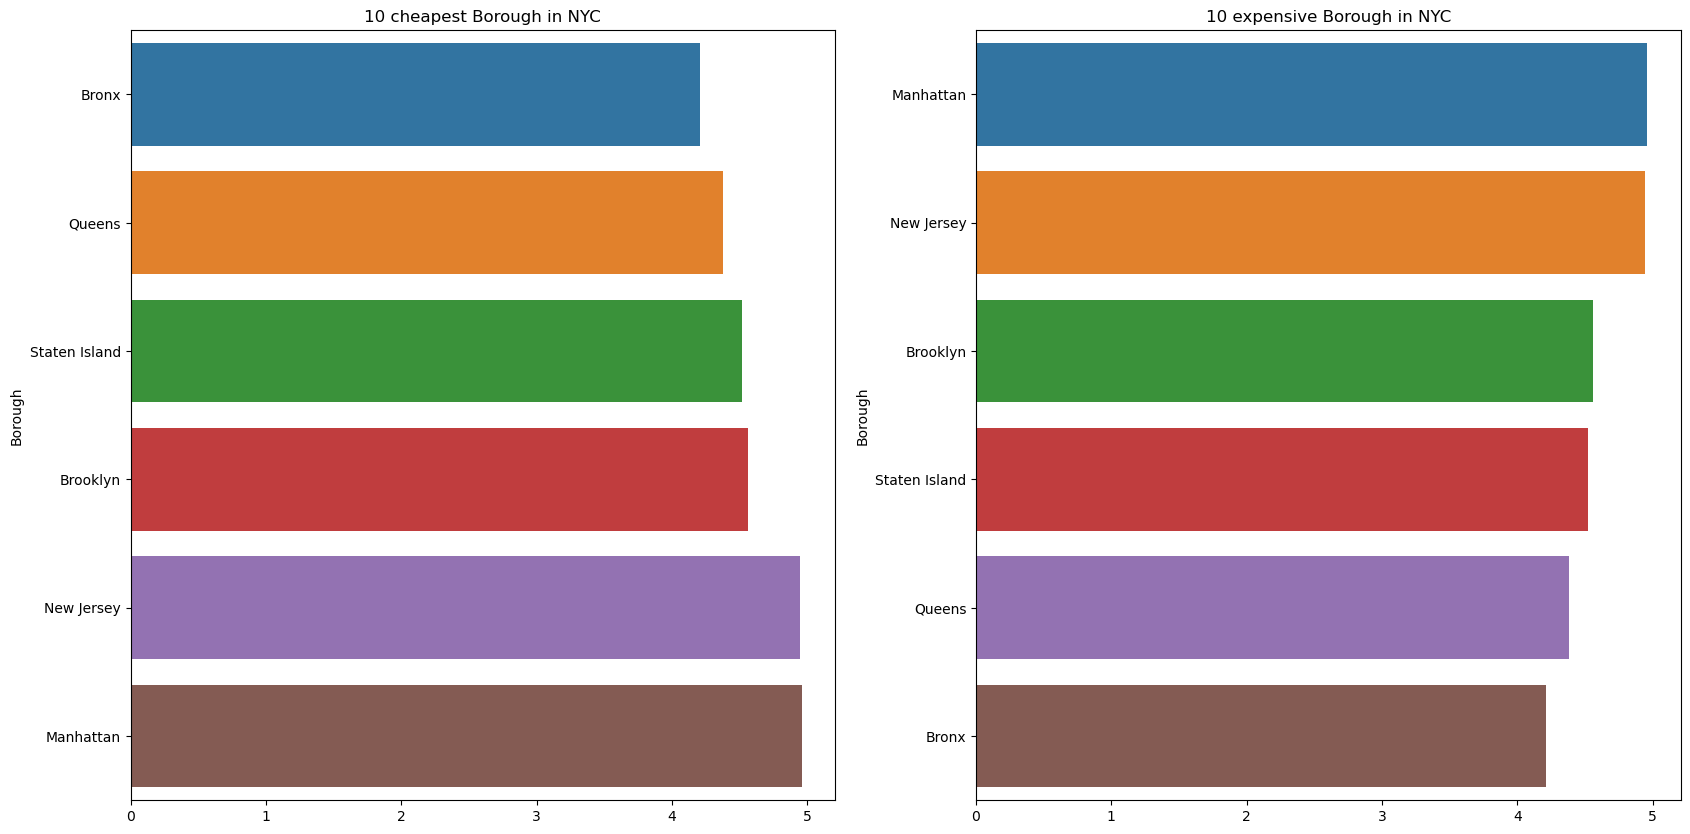

In [18]:
#Top 10 expensive & Cheapest Borough in NYC
a = data_cleaned.groupby('Borough')['log_price'].mean().sort_values(ascending=True).head(10)
b = data_cleaned.groupby('Borough')['log_price'].mean().sort_values(ascending=False).head(10)
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(121)
sns.barplot(y=a.index, x=a.values, ax=ax1)
ax1.set_title('10 cheapest Borough in NYC')
ax2 = fig.add_subplot(122)
sns.barplot(y=b.index, x=b.values, ax=ax2)
ax2.set_title('10 expensive Borough in NYC')
plt.show()

Text(0.5, 0, 'Type')

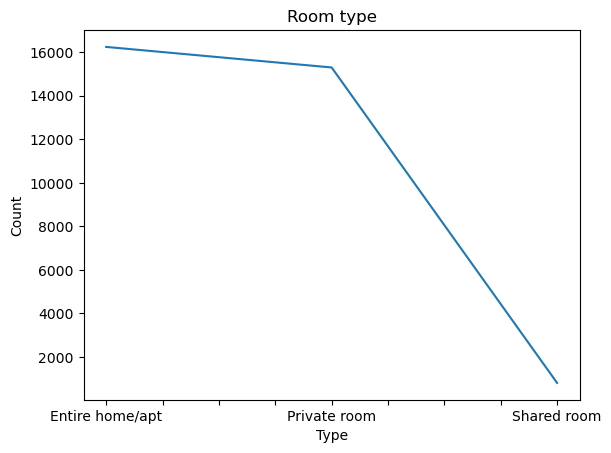

In [19]:
#Ploting room count
data_cleaned['room_type'].value_counts().plot(kind='line')
plt.title('Room type')
plt.ylabel('Count')
plt.xlabel('Type')

C:\Users\navab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\navab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\navab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0, 0.5, 'log_price')

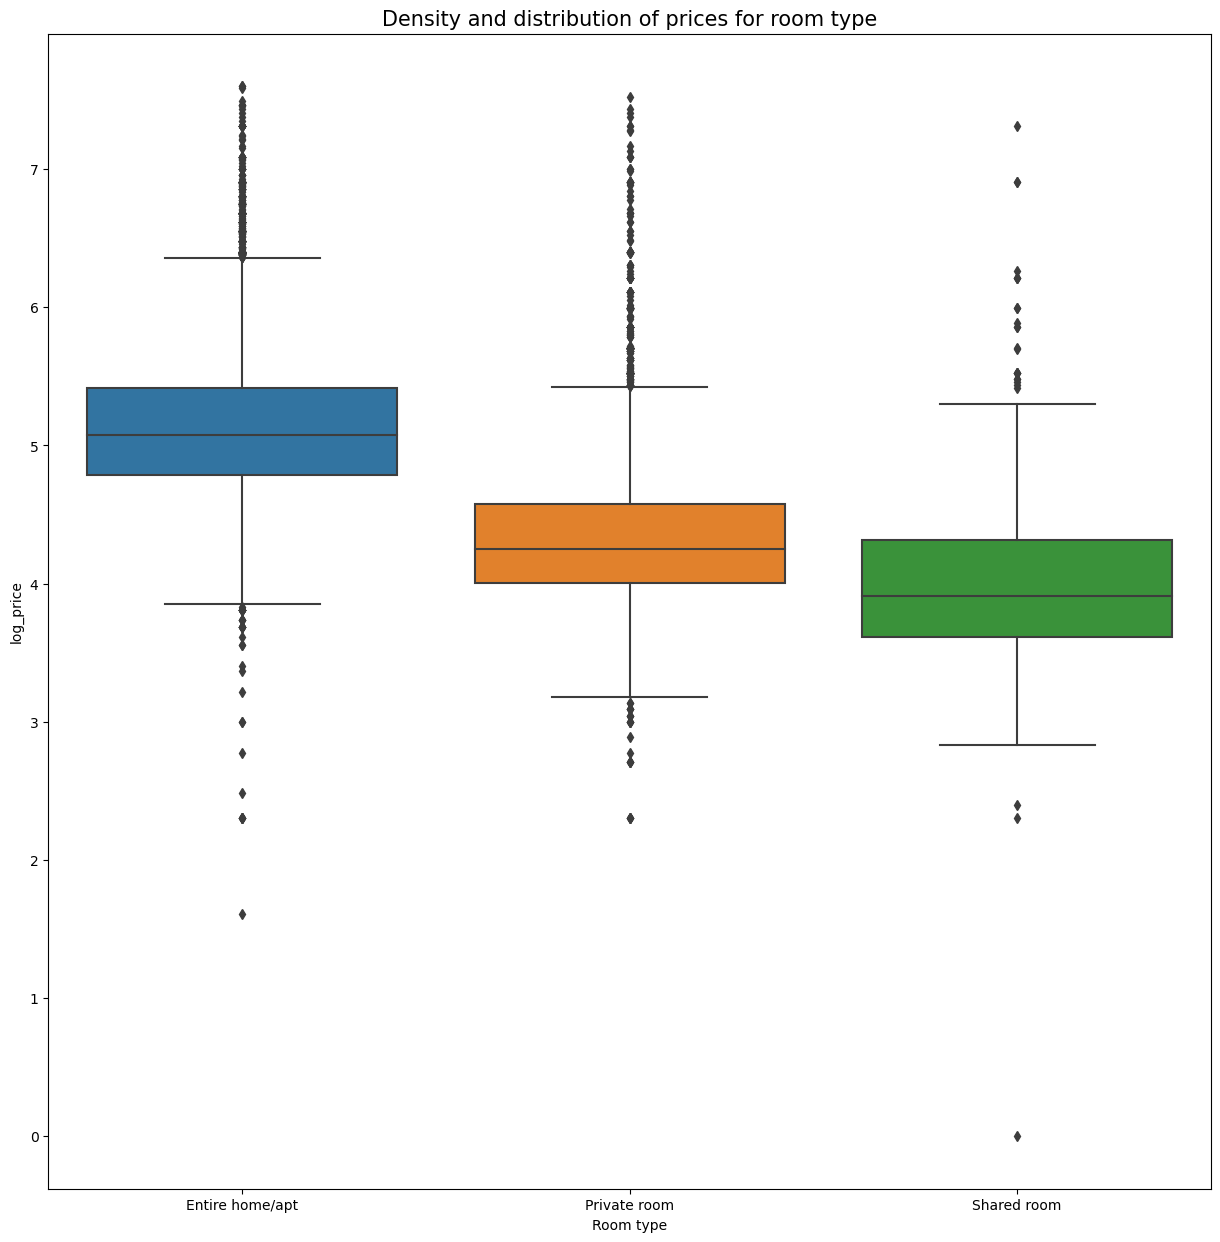

In [20]:
#Box Plot to view outliers
plt.figure(figsize=(15,15))
sns.boxplot(data=data_cleaned, x='room_type', y='log_price')
plt.title('Density and distribution of prices for room type', fontsize=15)
plt.xlabel('Room type')
plt.ylabel("log_price")

C:\Users\navab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\navab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\navab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\navab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

Text(0.5, 1.0, 'Room type vs log_price vs Instantly bookable')

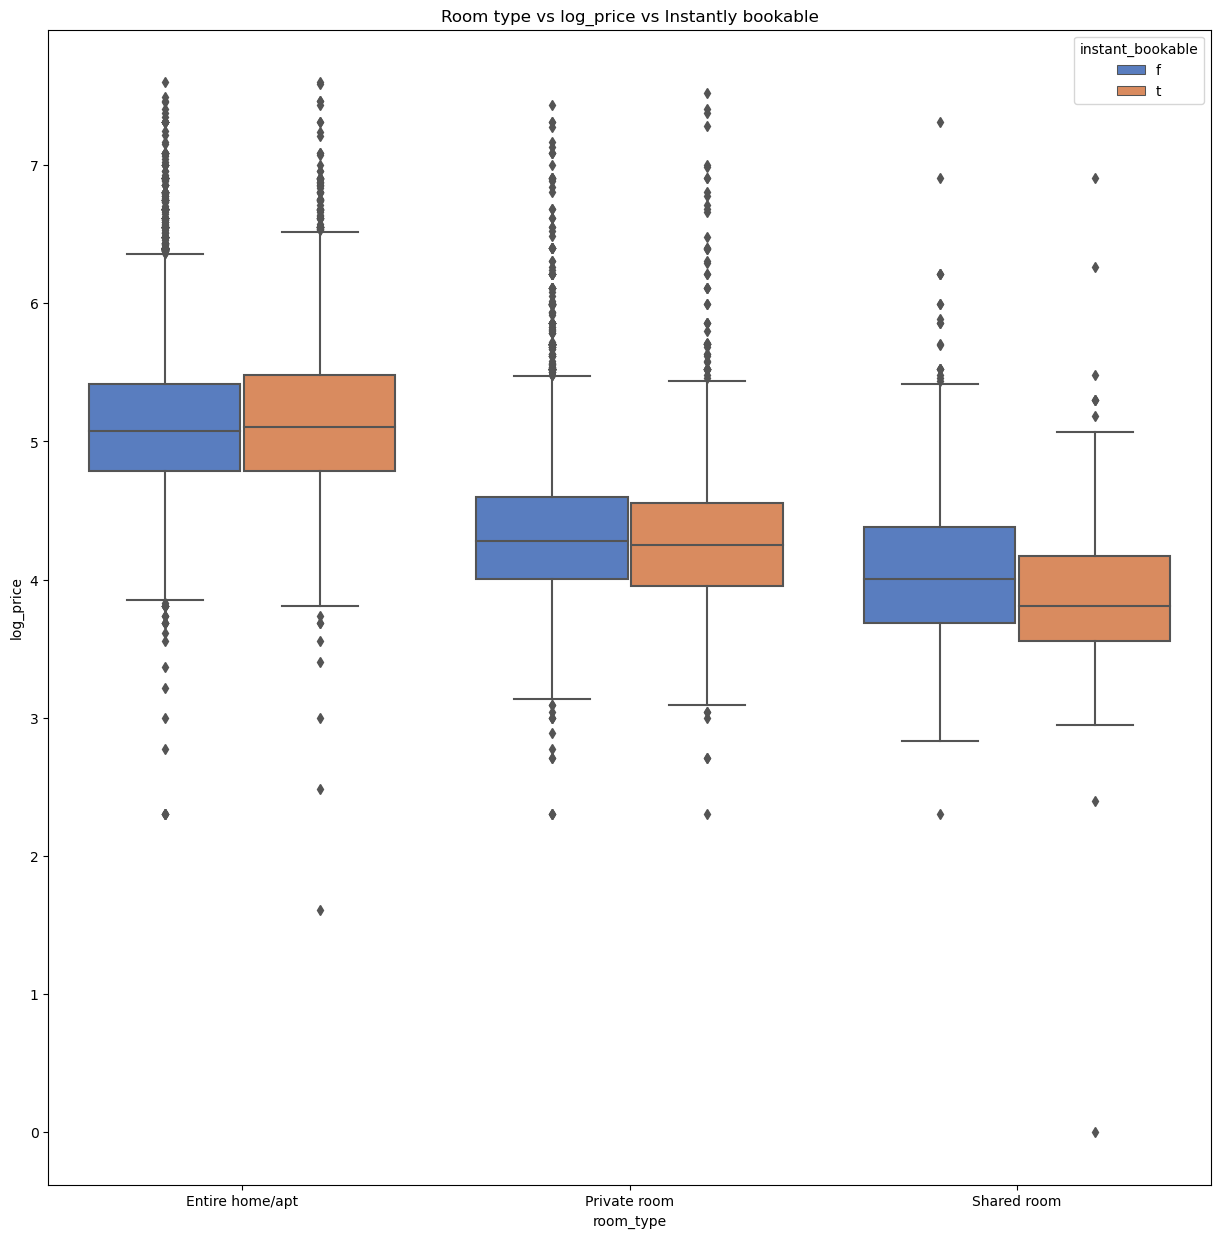

In [21]:
#correlating instant bookable rooms with price
plt.figure(figsize=(15,15))
sns.boxplot(x='room_type',y='log_price', hue="instant_bookable", data=data_cleaned, palette='muted')
plt.title("Room type vs log_price vs Instantly bookable")

C:\Users\navab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\navab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\navab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\navab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

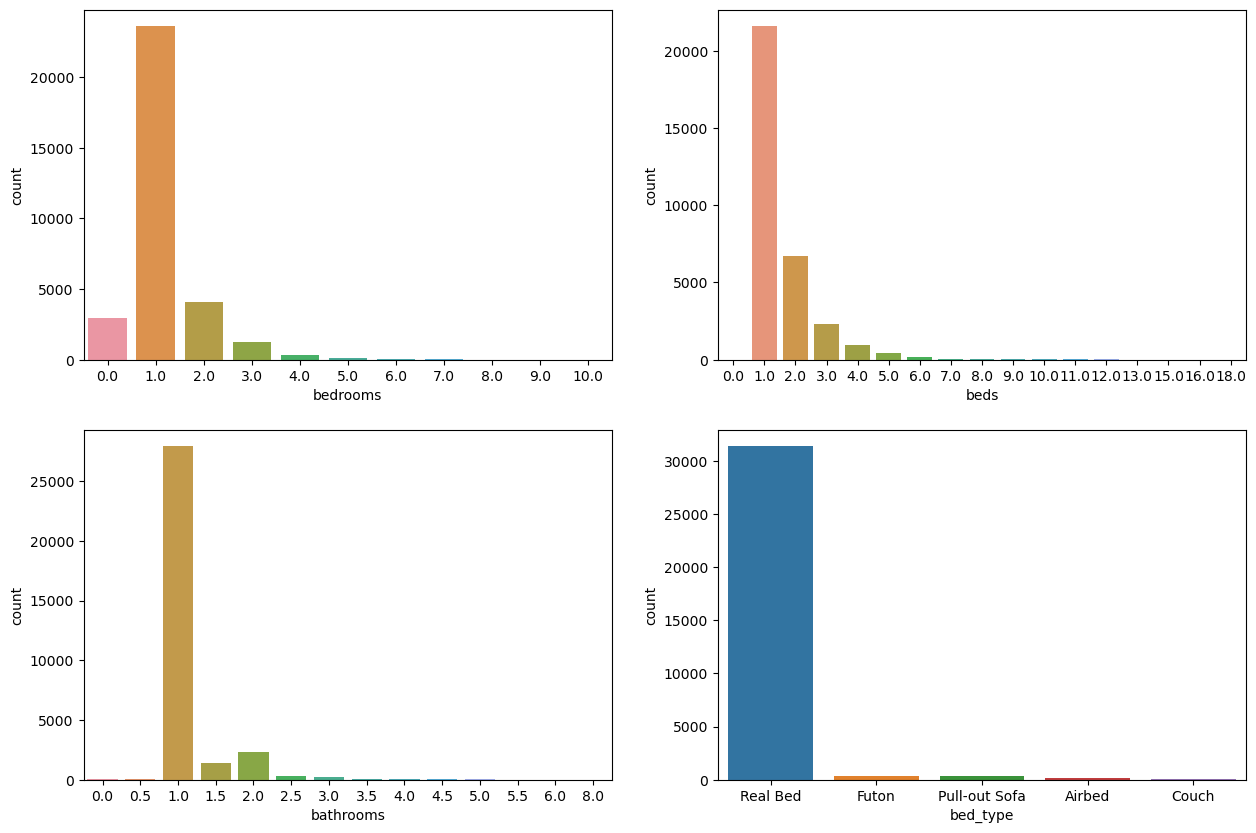

In [22]:
#plotting the count of bedrooms, beds and bathrooms.
a=['bedrooms','beds','bathrooms','bed_type']
fig, axes = plt.subplots(2,2, figsize=(15,10))
axes = [ax for axes_row in axes for ax in axes_row]
for i, c in enumerate(a):
    f = sns.countplot(x=data_cleaned[c], data=data_cleaned, ax=axes[i])

C:\Users\navab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\navab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\navab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'Number of accomodates vs Average Price')

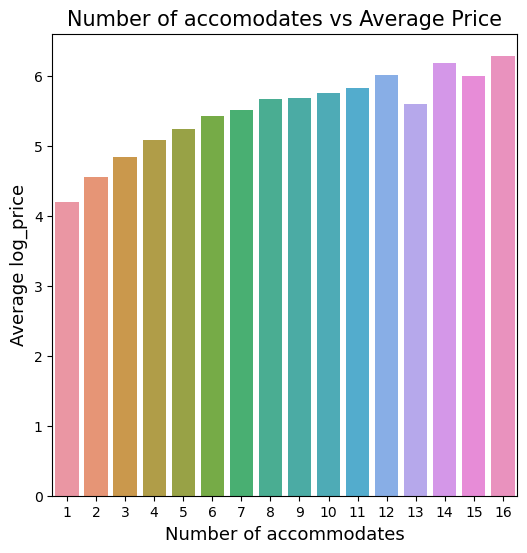

In [23]:
#plotting the number of accomodates vs mean price
a = data_cleaned.groupby('accommodates')['log_price'].mean()
fig = plt.figure(figsize=(6,6))
sns.barplot(y=a.values, x=a.index)
plt.xlabel("Number of accommodates", size=13)
plt.ylabel("Average log_price", size=13)
plt.title("Number of accomodates vs Average Price",size=15)

# PCA

In [27]:
#need to perform pca on dummy_df 
scaler = StandardScaler()


In [28]:
scaled_df = dummy_df.copy()

In [29]:
pca = PCA(n_components=116)

In [30]:
pca1=PCA(n_components = 6)

In [31]:
pca_fit = pca.fit(scaled_df)

In [32]:
pca_fit12 = pca1.fit(scaled_df)

In [33]:
pca_fit1=pca1.transform(scaled_df)

In [34]:
pca1.transform(scaled_df[:10])

array([[-0.90916489,  0.67098529, -0.11362837, -0.143054  , -0.47203793,
        -0.70811846],
       [ 0.22671311, -0.18588384, -0.12756037,  0.47851232, -0.9858864 ,
        -0.06805372],
       [ 0.84820567, -0.08654152, -0.83604227, -0.54867924,  0.09451501,
        -0.23088921],
       [-0.24722777, -0.4382555 , -0.02444861,  0.90540099,  0.08704122,
        -0.52673114],
       [ 0.55000783, -0.67199802, -0.45413866, -0.33247472,  0.5509238 ,
        -0.79010181],
       [ 1.38034558,  2.06977363,  1.27228   , -0.19027759, -0.23631966,
        -0.3181557 ],
       [-1.46252884,  0.63757736, -0.2360672 ,  0.39472172,  0.86736554,
         0.6486099 ],
       [ 2.65433137,  1.40603338,  1.58679579, -1.18163796,  0.83496523,
         0.25163726],
       [ 0.72370277, -0.96664181,  0.01645475,  0.60814722, -0.41227077,
        -0.09560317],
       [ 0.28946433, -0.71472352, -0.33852669,  1.53261092,  0.36807572,
        -1.15948001]])

In [35]:
pca_df=pd.DataFrame(pca_fit1)

In [36]:
pd.DataFrame(pca_fit.components_)

,0,1,2,3,4,5,6,7,8,9,...,106,107,108,109,110,111,112,113,114,115
0,0.137382,1.424372e-02,1.159859e-02,1.046229e-01,7.175293e-04,1.895863e-02,5.949161e-03,2.976313e-03,1.602122e-02,6.906973e-02,...,1.771138e-02,5.455106e-03,2.363949e-02,1.335250e-02,2.072628e-02,2.174453e-02,3.797818e-02,0.017441,7.706972e-03,3.726726e-02
1,-0.102945,1.650898e-02,1.363790e-02,-9.730801e-02,6.828271e-04,1.902324e-02,1.580759e-03,-2.544760e-04,5.085759e-03,2.520115e-02,...,1.804377e-02,5.893972e-03,2.374305e-02,1.388778e-02,2.029850e-02,7.788470e-03,-2.587156e-02,0.015851,1.698880e-01,1.599543e-01
2,-0.099197,2.259258e-02,1.815250e-02,5.003380e-03,9.998758e-04,3.168135e-02,6.524673e-03,2.827173e-03,1.626134e-02,5.870920e-02,...,2.865894e-02,8.480806e-03,3.722469e-02,2.188382e-02,3.298240e-02,2.074247e-02,-1.593448e-02,0.028776,-2.376671e-01,-2.576117e-01
3,-0.052632,4.916447e-04,7.661006e-04,-1.746111e-02,1.407422e-04,-5.131347e-04,-3.639441e-03,-1.615183e-03,-1.072232e-02,-2.185101e-02,...,1.139428e-03,6.738696e-04,1.922881e-03,1.255536e-03,1.869812e-03,-9.527494e-03,2.224336e-03,0.002910,4.561041e-01,4.312527e-01
4,0.123162,7.038752e-03,5.689725e-03,5.699134e-02,2.520919e-04,9.466329e-03,5.153235e-04,1.788714e-04,2.730256e-03,2.373407e-02,...,7.848097e-03,2.933133e-03,1.074480e-02,5.431693e-03,9.286294e-03,4.130888e-03,2.920407e-02,0.007779,2.590437e-01,2.584021e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,0.000131,7.821588e-03,2.630726e-02,3.825468e-04,9.196554e-01,-9.811466e-04,-2.531750e-03,-1.752887e-02,1.839599e-03,-1.278494e-04,...,-5.192839e-03,-2.199085e-02,2.939154e-03,9.005955e-03,-6.153782e-03,-2.779847e-03,4.588464e-05,0.004112,-2.303411e-04,1.209085e-04
112,-0.000034,1.725062e-03,-9.274587e-03,-1.710427e-04,-1.093741e-01,2.085890e-03,-1.352332e-02,1.052703e-02,-3.981587e-04,-9.865497e-04,...,6.663182e-03,1.885612e-02,-1.332500e-02,1.287227e-03,-2.918762e-03,-4.683143e-03,-3.177697e-04,0.001570,-2.231496e-04,3.785547e-04
113,0.000297,3.367874e-03,1.540443e-03,-1.342787e-04,5.670926e-03,7.543240e-04,-9.143931e-03,6.557999e-03,1.647344e-03,-6.064726e-04,...,-5.351768e-03,7.339905e-04,-2.359373e-04,4.352717e-03,-2.643777e-03,-2.526279e-03,9.641558e-04,0.001525,-5.307676e-04,3.430654e-04
114,0.000064,-1.906471e-03,1.450977e-03,-2.803750e-05,-4.258075e-04,-2.290550e-03,4.774788e-04,2.508663e-03,-1.454260e-03,6.720426e-04,...,-9.103961e-04,-8.870715e-03,5.177105e-04,-2.788709e-04,-6.812465e-04,1.047745e-03,-3.259363e-05,-0.001107,-3.784001e-05,3.014726e-05


In [37]:
pd.DataFrame(pca_fit12.components_)

,0,1,2,3,4,5,6,7,8,9,...,106,107,108,109,110,111,112,113,114,115
0,0.137382,0.014244,0.011599,0.104623,0.000718,0.018959,0.005949,0.002976,0.016021,0.069070,...,0.017711,0.005455,0.023639,0.013352,0.020726,0.021745,0.037978,0.017441,0.007707,0.037267
1,-0.102944,0.016509,0.013638,-0.097307,0.000683,0.019023,0.001581,-0.000254,0.005086,0.025201,...,0.018044,0.005894,0.023743,0.013888,0.020299,0.007788,-0.025872,0.015851,0.169888,0.159955
2,-0.099205,0.022592,0.018152,0.005005,0.001000,0.031681,0.006525,0.002827,0.016262,0.058710,...,0.028659,0.008481,0.037225,0.021884,0.032982,0.020743,-0.015935,0.028776,-0.237667,-0.257610
3,-0.052665,0.000491,0.000766,-0.017471,0.000141,-0.000513,-0.003639,-0.001615,-0.010722,-0.021849,...,0.001139,0.000674,0.001922,0.001255,0.001869,-0.009527,0.002224,0.002910,0.456103,0.431250
4,0.122919,0.007036,0.005686,0.056929,0.000252,0.009470,0.000516,0.000180,0.002736,0.023750,...,0.007844,0.002931,0.010739,0.005429,0.009281,0.004137,0.029201,0.007774,0.259038,0.258394
5,-0.136664,0.001830,0.001688,-0.020510,0.000169,0.002213,0.000467,0.000361,0.001447,-0.006237,...,0.001346,0.000832,0.002468,0.001819,0.002896,0.003354,-0.001297,0.000320,0.069879,0.046836


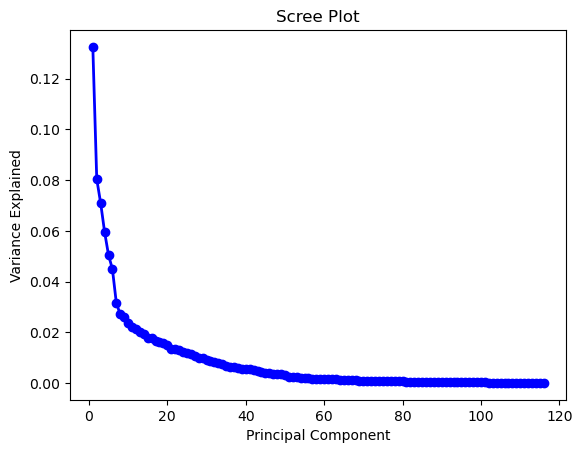

In [38]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [39]:
explained_variance_ratio = pca.explained_variance_ratio_

# Calculate cumulative explained variance ratio
cumulative_explained_variance_ratio = explained_variance_ratio.cumsum()

print("Explained variance ratio for all component:", sum(explained_variance_ratio))

# Print the explained variance ratio for each component
print("Explained variance ratio for each component:", explained_variance_ratio)


# Print the cumulative explained variance ratio
print("Cumulative explained variance ratio:", cumulative_explained_variance_ratio)

Explained variance ratio for all component: 1.0
Explained variance ratio for each component: [1.32567945e-01 8.04266572e-02 7.09118291e-02 5.95683487e-02
 5.04949937e-02 4.48684633e-02 3.14822833e-02 2.70797524e-02
 2.58612304e-02 2.37266904e-02 2.20166038e-02 2.14638717e-02
 2.02358341e-02 1.92712268e-02 1.77969374e-02 1.76495225e-02
 1.65787059e-02 1.61544953e-02 1.55819850e-02 1.50309018e-02
 1.35214999e-02 1.33990324e-02 1.29194003e-02 1.23611886e-02
 1.18621019e-02 1.13184802e-02 1.06696761e-02 9.99504872e-03
 9.65919278e-03 9.14702013e-03 8.77009747e-03 8.31529305e-03
 7.80500741e-03 7.41208754e-03 6.65461468e-03 6.29293220e-03
 6.10790544e-03 5.70003091e-03 5.53618886e-03 5.44233839e-03
 5.32057462e-03 4.90637714e-03 4.75299327e-03 4.46496400e-03
 4.07187966e-03 3.89717835e-03 3.71721368e-03 3.40863287e-03
 3.34388597e-03 3.12734654e-03 2.53253514e-03 2.42952885e-03
 2.34485795e-03 2.10073677e-03 1.98889028e-03 1.89456200e-03
 1.67739014e-03 1.66350047e-03 1.62960906e-03 1.56903

In [40]:
# Assuming you have already performed PCA and have your pca_df DataFrame
# And you have your original_variable_names available from your dummy_df

# Get the names of the original variables
original_variable_names = dummy_df.columns.tolist()

# Assuming you have your PCA models stored in pca_fit and pca_fit12
# pca_fit.components_ and pca_fit12.components_ contain the loadings (coefficients) of the original variables on each principal component
# You can print the top variables contributing to each principal component

# Now, let's print for pca_fit12 (with 6 components)
print("\nPrinting top variables for pca_fit12 (with 6 components):")
for i in range(len(pca_fit12.components_)):
    component_loadings = pca_fit12.components_[i]  # Loadings of the i-th principal component
    top_variable_indices = component_loadings.argsort()[::-1][:6]  # Get the indices of top 6 variables
    top_variables = [original_variable_names[idx] for idx in top_variable_indices]  # Get variable names
print(f"Principal Component {i+1} Top Variables:", top_variables)



Printing top variables for pca_fit12 (with 6 components):
Principal Component 6 Top Variables: ['Carbon monoxide detector', 'Fire extinguisher', 'First aid kit', 'Smoke detector', 'Safety card', 'Lock on bedroom door']


In [41]:
# Assuming data_cleaned is your DataFrame containing the cleaned data
df_cleaned = data_cleaned.copy()  # Make a copy to avoid modifying the original DataFrame

# Reset the index to start from 1 to 32,349
df_cleaned.reset_index(drop=True, inplace=True)
df_cleaned.index += 0
df_cleaned.index.name = 'id'

# Create a new DataFrame to append the modified data
new_df = pd.DataFrame()

# Append the modified DataFrame to the new DataFrame
new_df = pd.concat([new_df, df_cleaned])

# Now new_df contains the modified data with IDs starting from 1 to 32,349
data_cleaned=new_df.copy()

In [42]:
# Load PCA results
pca_results = pd.DataFrame(pca_fit12.components_)

# Merge PCA results with original data
result = pd.concat([new_df, pca_df], axis=1)

In [43]:
data_cleaned1=pd.read_csv("C:/Users/navab/Downloads/data_cleaned.csv")

In [44]:
draft_result = pd.concat([data_cleaned1, pca_df], axis=1)

In [ ]:
#change pca values when rerunnning the code

In [45]:
np.random.seed(42)

In [46]:
X = result[[0,1,2,3,4,5, 'room_type','bathrooms','bedrooms','accommodates','cleaning_fee','Borough']] # Dropping irrelevant columns
y = result['log_price']

In [47]:
# Load the new Excel file
new_data = pd.read_excel('C:/Users/navab/OneDrive/Documents/masterclass/append.xlsx')
#C:/Users/navab/OneDrive/Documents/masterclass/append


# Assuming the new columns you want to append are named 'column1' and 'column2'
new_columns = new_data[['avg_lead_time','min_lead_time','min_airport_time', 'avg_airport_time','man_time',
                        'bro_time','que_time','bnx_time','sta_time','nj_time']]

# Concatenate the new columns with the existing features matrix X
X = pd.concat([X, new_columns], axis=1)

# Now X contains the additional columns from the new dataset
eda = pd.concat([X, y], axis=1)

# Test Train Split

In [48]:
# Split the data into train and test sets (60/20/20)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [49]:
X_train.dtypes

0                   float64
1                   float64
2                   float64
3                   float64
4                   float64
5                   float64
room_type            object
bathrooms           float64
bedrooms            float64
accommodates          int64
cleaning_fee           bool
Borough              object
avg_lead_time       float64
min_lead_time       float64
min_airport_time    float64
avg_airport_time    float64
man_time            float64
bro_time            float64
que_time            float64
bnx_time            float64
sta_time            float64
nj_time             float64
dtype: object

# One Hot Encoding

In [50]:
#identifying numerical and categorial columns for one-hot encoding
numerical_columns = ['0','1','2','3','4','5','bathrooms', 'bedrooms', 'accommodates', 'cleaning_fee',
                  'avg_lead_time', 'min_lead_time', 'min_airport_time',
                  'avg_airport_time', 'man_time', 'bro_time', 'que_time',
                  'bnx_time', 'sta_time', 'nj_time']
categorical_columns = ['room_type','Borough']

# Defining Model Evaluation Parameters

In [51]:
# Calculate RMSE and R2 for each model
def evaluate_model(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return rmse, r2

# Preprocessing Pipeline 

In [52]:
# Define preprocessing steps for numerical and categorical columns
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [53]:
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [54]:
# Combine preprocessing pipelines using ColumnTransformer
preprocessor = ColumnTransformer([
    ('cat', categorical_pipeline, categorical_columns),
    ('num', numerical_pipeline, numerical_columns)
])

# 1. Linear Regression

In [55]:
# Define the Linear model
linear_model = LinearRegression()

In [56]:
X_train.columns = X_train.columns.astype(str)

In [57]:
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['room_type', 'Borough']),
                                ('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['0', '1', '2', '3', '4', '5', 'bathrooms',
                                  'bedrooms', 'accommodates', 'cleaning_fee',
                                  'avg_lead_time', 'min_lead_time',
                                  'min_airport_time', 'avg_airport_time',
                                  'man_time', 'bro_time', 'que_time',
                                  'bnx_time', 'sta_time', 'nj_time'])])

In [58]:
# Transform the training data using the fitted preprocessor
X_train_transformed = preprocessor.transform(X_train)

In [59]:
# Fit the models
linear_model.fit(X_train_transformed, y_train) 

LinearRegression()

# Predictions - Train

In [60]:
# 1. Training dataset -
linear_pred_train = linear_model.predict(X_train_transformed)

In [61]:
linear_train_rmse, linear_train_r2 = evaluate_model(y_train, linear_pred_train)

In [62]:
# Evaluating Performance
print("Linear Regression: \nRMSE =", linear_train_rmse, "\nR2 =", linear_train_r2)

Linear Regression: 
RMSE = 0.3864768127901715 
R2 = 0.6586358526376852


In [63]:
X_val.columns = X_val.columns.astype(str)

In [64]:
preprocessor.fit(X_val)

ColumnTransformer(transformers=[('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['room_type', 'Borough']),
                                ('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['0', '1', '2', '3', '4', '5', 'bathrooms',
                                  'bedrooms', 'accommodates', 'cleaning_fee',
                                  'avg_lead_time', 'min_lead_time',
                                  'min_airport_time', 'avg_airport_time',
                                  'man_time', 'bro_time', 'que_time',
                                  'bnx_time', 'sta_time', 'nj_time'])])

In [65]:
# Transform the training data using the fitted preprocessor
X_val_transformed = preprocessor.transform(X_val)

In [66]:
# Fit the models
linear_model.fit(X_val_transformed, y_val) 

LinearRegression()

In [67]:
# 2. Validation dataset - 
linear_pred_val = linear_model.predict(X_val_transformed)

In [68]:
linear_val_rmse, linear_val_r2 = evaluate_model(y_val, linear_pred_val)

In [69]:
# Evaluating Performance
print("Linear Regression: \nRMSE =", linear_val_rmse, "\nR2 =", linear_val_r2)

Linear Regression: 
RMSE = 0.38930113695805324 
R2 = 0.6548522412933646


# Prediction Test

In [70]:
X_test.columns = X_test.columns.astype(str)

In [71]:
preprocessor.fit(X_test)

ColumnTransformer(transformers=[('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['room_type', 'Borough']),
                                ('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['0', '1', '2', '3', '4', '5', 'bathrooms',
                                  'bedrooms', 'accommodates', 'cleaning_fee',
                                  'avg_lead_time', 'min_lead_time',
                                  'min_airport_time', 'avg_airport_time',
                                  'man_time', 'bro_time', 'que_time',
                                  'bnx_time', 'sta_time', 'nj_time'])])

In [72]:
# Transform the training data using the fitted preprocessor
X_test_transformed = preprocessor.transform(X_test)

In [73]:
# Fit the models
linear_model.fit(X_test_transformed, y_test) 

LinearRegression()

In [74]:
# 1. Training dataset -
linear_pred_test = linear_model.predict(X_test_transformed)

In [75]:
linear_test_rmse, linear_test_r2 = evaluate_model(y_test, linear_pred_test)

In [76]:
# Evaluating Performance
print("Linear Regression: \nRMSE =", linear_test_rmse, "\nR2 =", linear_test_r2)

Linear Regression: 
RMSE = 0.3774101110088497 
R2 = 0.6736818769679825


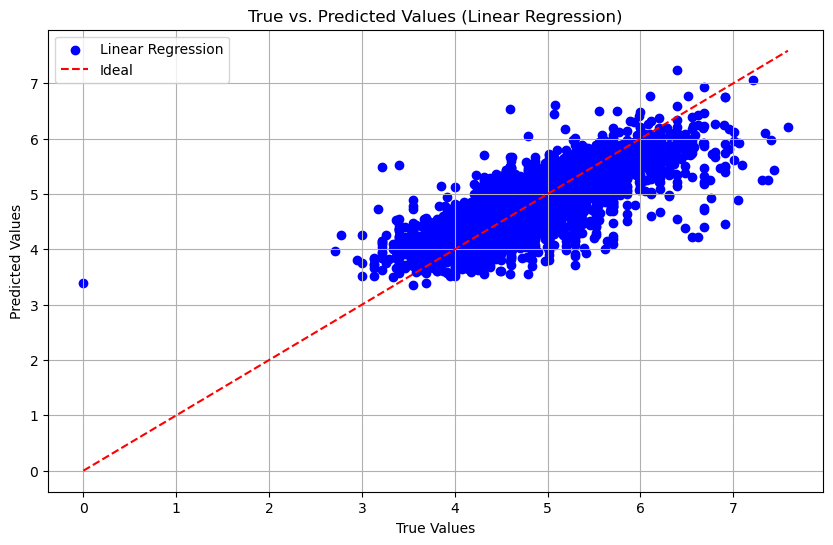

In [77]:
# Plot true vs. predicted values for Linear Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, linear_pred_test, color='blue', label='Linear Regression')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', label='Ideal')
plt.title('True vs. Predicted Values (Linear Regression)')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

# 2. Ridge Regression

In [78]:
param_grid_ridge = {'ridge__alpha': [0.1, 1.0, 10.0]}

In [79]:
pipeline_ridge = Pipeline([
    ('preprocessor', preprocessor),
    ('ridge', Ridge())
])

In [80]:
# Define grid search for each model
grid_search_ridge = GridSearchCV(pipeline_ridge, param_grid_ridge, cv=5, scoring='neg_mean_squared_error')

# Predictions : Train

In [81]:
# Convert column names to strings
X_train.columns = X_train.columns.astype(str)

In [82]:
grid_search_ridge.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['room_type',
                                                                          'Borough']),
                                                                        ('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['0',
                                                                          '1',
                                                                          '2',
                                                                          '3',
                                                                          '4',
                                                                          '5',
                                                                          'bathrooms',
                                                                          'bedrooms',
                                                                          'accommodates',
                                                                          'cleaning_fee',
                                                                          'avg_lead_time',
                                                                          'min_lead_time',
                                                                          'min_airport_time',
                                                                          'avg_airport_time',
                                                                          'man_time',
                                                                          'bro_time',
                                                                          'que_time',
                                                                          'bnx_time',
                                                                          'sta_time',
                                                                          'nj_time'])])),
                                       ('ridge', Ridge())]),
             param_grid={'ridge__alpha': [0.1, 1.0, 10.0]},
             scoring='neg_mean_squared_error')

In [83]:
#get the best estimators
best_ridge = grid_search_ridge.best_estimator_

In [84]:
# Predictions for Ridge and Lasso
ridge_pred = best_ridge.predict(X_train)

In [85]:
# Calculate RMSE and R2 for Ridge and Lasso
ridge_train_rmse, ridge_train_r2 = evaluate_model(y_train, ridge_pred)

In [86]:
print("Ridge: \nRMSE =", ridge_train_rmse, "R2 =", ridge_train_r2)

Ridge: 
RMSE = 0.3864746582212765 R2 = 0.6586396587678295


# Prediction Val

In [87]:
# Convert column names to strings
X_val.columns = X_val.columns.astype(str)

In [88]:
grid_search_ridge.fit(X_val, y_val)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['room_type',
                                                                          'Borough']),
                                                                        ('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['0',
                                                                          '1',
                                                                          '2',
                                                                          '3',
                                                                          '4',
                                                                          '5',
                                                                          'bathrooms',
                                                                          'bedrooms',
                                                                          'accommodates',
                                                                          'cleaning_fee',
                                                                          'avg_lead_time',
                                                                          'min_lead_time',
                                                                          'min_airport_time',
                                                                          'avg_airport_time',
                                                                          'man_time',
                                                                          'bro_time',
                                                                          'que_time',
                                                                          'bnx_time',
                                                                          'sta_time',
                                                                          'nj_time'])])),
                                       ('ridge', Ridge())]),
             param_grid={'ridge__alpha': [0.1, 1.0, 10.0]},
             scoring='neg_mean_squared_error')

In [89]:
#get the best estimators
best_ridge = grid_search_ridge.best_estimator_

In [90]:
# Predictions for Ridge and Lasso
ridge_pred = best_ridge.predict(X_val)

In [91]:
# Calculate RMSE and R2 for Ridge and Lasso
ridge_val_rmse, ridge_val_r2 = evaluate_model(y_val, ridge_pred)

In [92]:
print("Ridge: \nRMSE =", ridge_val_rmse, "R2 =", ridge_val_r2)

Ridge: 
RMSE = 0.38930444603028147 R2 = 0.6548463737342511


# Prediction Test

In [93]:
# Convert column names to strings
X_test.columns = X_test.columns.astype(str)

In [94]:
grid_search_ridge.fit(X_test, y_test)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['room_type',
                                                                          'Borough']),
                                                                        ('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['0',
                                                                          '1',
                                                                          '2',
                                                                          '3',
                                                                          '4',
                                                                          '5',
                                                                          'bathrooms',
                                                                          'bedrooms',
                                                                          'accommodates',
                                                                          'cleaning_fee',
                                                                          'avg_lead_time',
                                                                          'min_lead_time',
                                                                          'min_airport_time',
                                                                          'avg_airport_time',
                                                                          'man_time',
                                                                          'bro_time',
                                                                          'que_time',
                                                                          'bnx_time',
                                                                          'sta_time',
                                                                          'nj_time'])])),
                                       ('ridge', Ridge())]),
             param_grid={'ridge__alpha': [0.1, 1.0, 10.0]},
             scoring='neg_mean_squared_error')

In [95]:
#get the best estimators
best_ridge = grid_search_ridge.best_estimator_

In [96]:
# Predictions for Ridge and Lasso
ridge_pred = best_ridge.predict(X_test)

In [97]:
# Calculate RMSE and R2 for Ridge and Lasso
ridge_test_rmse, ridge_test_r2 = evaluate_model(y_test, ridge_pred)

In [98]:
print("Ridge: \nRMSE =", ridge_test_rmse, "R2 =", ridge_test_r2)

Ridge: 
RMSE = 0.37741497743634494 R2 = 0.6736734616464113


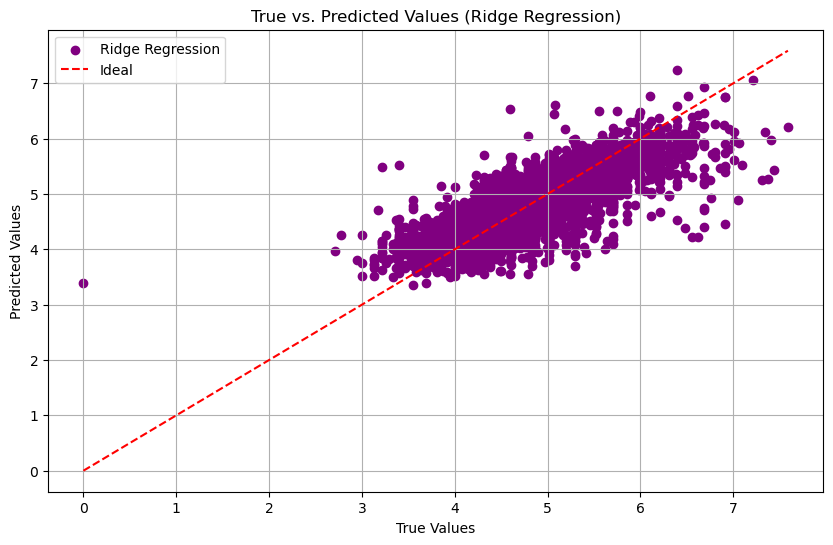

In [99]:
# Plot true vs. predicted values for Linear Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, ridge_pred, color='purple', label='Ridge Regression')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', label='Ideal')
plt.title('True vs. Predicted Values (Ridge Regression)')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

# 3. Lasso

In [100]:
param_grid_lasso = {'lasso__alpha': [0.1, 1.0, 10.0]}

In [101]:
pipeline_lasso = Pipeline([
    ('preprocessor', preprocessor),
    ('lasso', Lasso())
])

In [102]:
grid_search_lasso = GridSearchCV(pipeline_lasso, param_grid_lasso, cv=5, scoring='neg_mean_squared_error')

# Prediction Train

In [103]:
# Convert column names to strings
X_train.columns = X_train.columns.astype(str)

In [104]:
grid_search_lasso.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['room_type',
                                                                          'Borough']),
                                                                        ('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['0',
                                                                          '1',
                                                                          '2',
                                                                          '3',
                                                                          '4',
                                                                          '5',
                                                                          'bathrooms',
                                                                          'bedrooms',
                                                                          'accommodates',
                                                                          'cleaning_fee',
                                                                          'avg_lead_time',
                                                                          'min_lead_time',
                                                                          'min_airport_time',
                                                                          'avg_airport_time',
                                                                          'man_time',
                                                                          'bro_time',
                                                                          'que_time',
                                                                          'bnx_time',
                                                                          'sta_time',
                                                                          'nj_time'])])),
                                       ('lasso', Lasso())]),
             param_grid={'lasso__alpha': [0.1, 1.0, 10.0]},
             scoring='neg_mean_squared_error')

In [105]:
best_lasso = grid_search_lasso.best_estimator_

In [106]:
lasso_pred = best_lasso.predict(X_train)

In [107]:
lasso_train_rmse, lasso_train_r2 = evaluate_model(y_train, lasso_pred)

In [108]:
print("Lasso: \nRMSE =", lasso_train_rmse, "R2 =", lasso_train_r2)

Lasso: 
RMSE = 0.4703885821723464 R2 = 0.49430976965207496


# Prediction val

In [109]:
# Convert column names to strings
X_train.columns = X_train.columns.astype(str)

In [110]:
grid_search_lasso.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['room_type',
                                                                          'Borough']),
                                                                        ('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['0',
                                                                          '1',
                                                                          '2',
                                                                          '3',
                                                                          '4',
                                                                          '5',
                                                                          'bathrooms',
                                                                          'bedrooms',
                                                                          'accommodates',
                                                                          'cleaning_fee',
                                                                          'avg_lead_time',
                                                                          'min_lead_time',
                                                                          'min_airport_time',
                                                                          'avg_airport_time',
                                                                          'man_time',
                                                                          'bro_time',
                                                                          'que_time',
                                                                          'bnx_time',
                                                                          'sta_time',
                                                                          'nj_time'])])),
                                       ('lasso', Lasso())]),
             param_grid={'lasso__alpha': [0.1, 1.0, 10.0]},
             scoring='neg_mean_squared_error')

In [111]:
best_lasso = grid_search_lasso.best_estimator_

In [112]:
lasso_pred = best_lasso.predict(X_train)

In [113]:
lasso_train_rmse, lasso_train_r2 = evaluate_model(y_train, lasso_pred)

In [114]:
print("Ridge: \nRMSE =", ridge_train_rmse, "R2 =", ridge_train_r2)

Ridge: 
RMSE = 0.3864746582212765 R2 = 0.6586396587678295


# Prediction Test

In [115]:
# Convert column names to strings
X_test.columns = X_test.columns.astype(str)

In [116]:
grid_search_lasso.fit(X_test, y_test)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['room_type',
                                                                          'Borough']),
                                                                        ('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['0',
                                                                          '1',
                                                                          '2',
                                                                          '3',
                                                                          '4',
                                                                          '5',
                                                                          'bathrooms',
                                                                          'bedrooms',
                                                                          'accommodates',
                                                                          'cleaning_fee',
                                                                          'avg_lead_time',
                                                                          'min_lead_time',
                                                                          'min_airport_time',
                                                                          'avg_airport_time',
                                                                          'man_time',
                                                                          'bro_time',
                                                                          'que_time',
                                                                          'bnx_time',
                                                                          'sta_time',
                                                                          'nj_time'])])),
                                       ('lasso', Lasso())]),
             param_grid={'lasso__alpha': [0.1, 1.0, 10.0]},
             scoring='neg_mean_squared_error')

In [117]:
best_lasso = grid_search_lasso.best_estimator_

In [118]:
lasso_pred = best_lasso.predict(X_test)

In [119]:
lasso_test_rmse, lasso_test_r2 = evaluate_model(y_test, lasso_pred)

In [120]:
print("Ridge: \nRMSE =", lasso_test_rmse, "R2 =", lasso_test_r2)

Ridge: 
RMSE = 0.4677051547103826 R2 = 0.4988607194124248


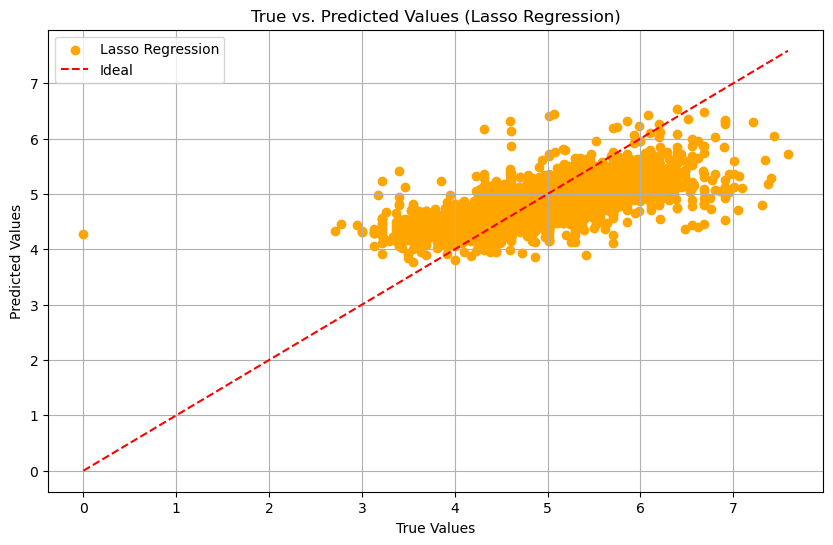

In [121]:
# Plot true vs. predicted values for Linear Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, lasso_pred, color='orange', label='Lasso Regression')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', label='Ideal')
plt.title('True vs. Predicted Values (Lasso Regression)')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

# 4.Random Forest

In [122]:
param_grid_random_forest = {'random_forest__n_estimators': [50, 100, 150],
                           'random_forest__max_depth': [1,2,3,4]}

In [123]:
pipeline_random_forest = Pipeline([
    ('preprocessor', preprocessor),
    ('random_forest', RandomForestRegressor())
])

In [124]:
grid_search_random_forest = GridSearchCV(pipeline_random_forest, param_grid_random_forest, cv=5, scoring='neg_mean_squared_error')

# Prediction Train

In [125]:
X_train.columns = X_train.columns.astype(str)

In [126]:
grid_search_random_forest.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['room_type',
                                                                          'Borough']),
                                                                        ('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['0',
                                                                          '1'...
                                                                          'bedrooms',
                                                                          'accommodates',
                                                                          'cleaning_fee',
                                                                          'avg_lead_time',
                                                                          'min_lead_time',
                                                                          'min_airport_time',
                                                                          'avg_airport_time',
                                                                          'man_time',
                                                                          'bro_time',
                                                                          'que_time',
                                                                          'bnx_time',
                                                                          'sta_time',
                                                                          'nj_time'])])),
                                       ('random_forest',
                                        RandomForestRegressor())]),
             param_grid={'random_forest__max_depth': [1, 2, 3, 4],
                         'random_forest__n_estimators': [50, 100, 150]},
             scoring='neg_mean_squared_error')

In [127]:
best_random_forest = grid_search_random_forest.best_estimator_

In [128]:
rf_pred = best_random_forest.predict(X_train)

In [129]:
rf_train_rmse, rf_train_r2 = evaluate_model(y_train, rf_pred)

In [130]:
print("Random Forest: \nRMSE =", rf_train_rmse, "R2 =", rf_train_r2)

Random Forest: 
RMSE = 0.4065722567614497 R2 = 0.6222134420451775


# Prediction val

In [131]:
X_val.columns = X_val.columns.astype(str)

In [132]:
grid_search_random_forest.fit(X_val, y_val)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['room_type',
                                                                          'Borough']),
                                                                        ('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['0',
                                                                          '1'...
                                                                          'bedrooms',
                                                                          'accommodates',
                                                                          'cleaning_fee',
                                                                          'avg_lead_time',
                                                                          'min_lead_time',
                                                                          'min_airport_time',
                                                                          'avg_airport_time',
                                                                          'man_time',
                                                                          'bro_time',
                                                                          'que_time',
                                                                          'bnx_time',
                                                                          'sta_time',
                                                                          'nj_time'])])),
                                       ('random_forest',
                                        RandomForestRegressor())]),
             param_grid={'random_forest__max_depth': [1, 2, 3, 4],
                         'random_forest__n_estimators': [50, 100, 150]},
             scoring='neg_mean_squared_error')

In [133]:
best_random_forest = grid_search_random_forest.best_estimator_

In [134]:
rf_pred = best_random_forest.predict(X_val)

In [135]:
rf_val_rmse, rf_val_r2 = evaluate_model(y_val, rf_pred)

In [136]:
print("Random Forest: \nRMSE =", rf_val_rmse, "R2 =", rf_val_r2)

Random Forest: 
RMSE = 0.403494942162454 R2 = 0.6292254608748855


# Prediction Test

In [137]:
X_test.columns = X_test.columns.astype(str)

In [138]:
grid_search_random_forest.fit(X_test, y_test)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['room_type',
                                                                          'Borough']),
                                                                        ('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['0',
                                                                          '1'...
                                                                          'bedrooms',
                                                                          'accommodates',
                                                                          'cleaning_fee',
                                                                          'avg_lead_time',
                                                                          'min_lead_time',
                                                                          'min_airport_time',
                                                                          'avg_airport_time',
                                                                          'man_time',
                                                                          'bro_time',
                                                                          'que_time',
                                                                          'bnx_time',
                                                                          'sta_time',
                                                                          'nj_time'])])),
                                       ('random_forest',
                                        RandomForestRegressor())]),
             param_grid={'random_forest__max_depth': [1, 2, 3, 4],
                         'random_forest__n_estimators': [50, 100, 150]},
             scoring='neg_mean_squared_error')

In [139]:
best_random_forest = grid_search_random_forest.best_estimator_

In [140]:
rf_pred = best_random_forest.predict(X_test)

In [141]:
rf_test_rmse, rf_test_r2 = evaluate_model(y_test, rf_pred)

In [142]:
print("Random Forest: \nRMSE =", rf_test_rmse, "R2 =", rf_test_r2)

Random Forest: 
RMSE = 0.3915295827792412 R2 = 0.6488090664043298


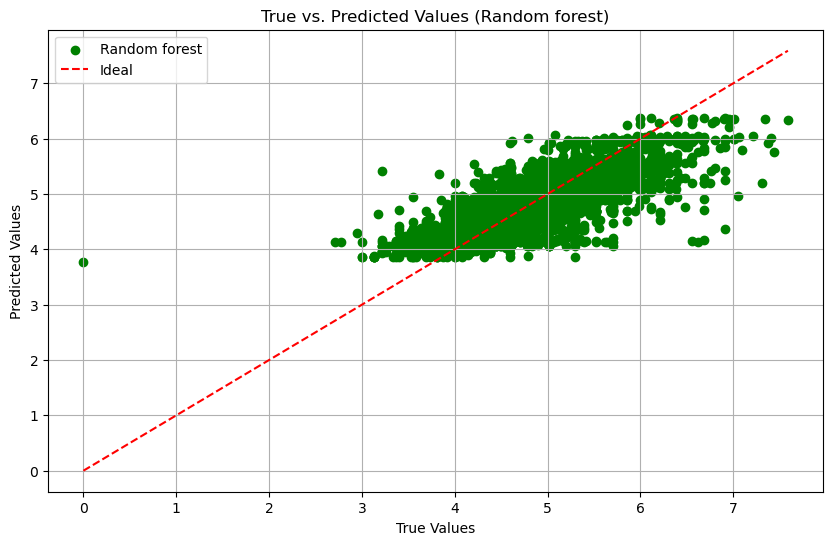

In [143]:
# Plot true vs. predicted values for Linear Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_pred, color='green', label='Random forest')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', label='Ideal')
plt.title('True vs. Predicted Values (Random forest)')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

# 5. XGradient Boosting

In [144]:
param_grid_xgb = {'xgb__n_estimators': [50, 100, 150],
                  'xgb__learning_rate': [0.05, 0.1, 0.2],
                 'xgb__max_depth': [3, 5, 7]}

In [145]:
pipeline_xgb = Pipeline([
    ('preprocessor', preprocessor),
    ('xgb', XGBRegressor())
])

In [146]:
grid_search_xgb = GridSearchCV(pipeline_xgb, param_grid_xgb, cv=5, scoring='neg_mean_squared_error')

# Prediction Train

In [147]:
# Convert column names to strings
X_train.columns = X_train.columns.astype(str)

In [148]:
grid_search_xgb.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['room_type',
                                                                          'Borough']),
                                                                        ('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['0',
                                                                          '1'...
                                                     max_delta_step=None,
                                                     max_depth=None,
                                                     max_leaves=None,
                                                     min_child_weight=None,
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     multi_strategy=None,
                                                     n_estimators=None,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     random_state=None, ...))]),
             param_grid={'xgb__learning_rate': [0.05, 0.1, 0.2],
                         'xgb__max_depth': [3, 5, 7],
                         'xgb__n_estimators': [50, 100, 150]},
             scoring='neg_mean_squared_error')

In [149]:
best_xgb = grid_search_xgb.best_estimator_

In [150]:
xgb_pred = best_xgb.predict(X_train)

In [151]:
xgb_train_rmse, xgb_train_r2 = evaluate_model(y_train, xgb_pred)

In [152]:
print("XGBoost: \nRMSE =", xgb_train_rmse, "R2 =", xgb_train_r2)

XGBoost: 
RMSE = 0.33748424812503847 R2 = 0.7396976824241108


# Prediction val

In [153]:
# Convert column names to strings
X_val.columns = X_val.columns.astype(str)

In [154]:
grid_search_xgb.fit(X_val, y_val)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['room_type',
                                                                          'Borough']),
                                                                        ('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['0',
                                                                          '1'...
                                                     max_delta_step=None,
                                                     max_depth=None,
                                                     max_leaves=None,
                                                     min_child_weight=None,
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     multi_strategy=None,
                                                     n_estimators=None,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     random_state=None, ...))]),
             param_grid={'xgb__learning_rate': [0.05, 0.1, 0.2],
                         'xgb__max_depth': [3, 5, 7],
                         'xgb__n_estimators': [50, 100, 150]},
             scoring='neg_mean_squared_error')

In [155]:
best_xgb = grid_search_xgb.best_estimator_

In [156]:
xgb_pred = best_xgb.predict(X_val)

In [157]:
xgb_val_rmse, xgb_val_r2 = evaluate_model(y_val, xgb_pred)

In [158]:
print("XGBoost: \nRMSE =", xgb_val_rmse, "R2 =", xgb_val_r2)

XGBoost: 
RMSE = 0.30957222186827077 R2 = 0.7817482765706563


# Prediction Test

In [159]:
# Convert column names to strings
X_test.columns = X_test.columns.astype(str)

In [160]:
grid_search_xgb.fit(X_test, y_test)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['room_type',
                                                                          'Borough']),
                                                                        ('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['0',
                                                                          '1'...
                                                     max_delta_step=None,
                                                     max_depth=None,
                                                     max_leaves=None,
                                                     min_child_weight=None,
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     multi_strategy=None,
                                                     n_estimators=None,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     random_state=None, ...))]),
             param_grid={'xgb__learning_rate': [0.05, 0.1, 0.2],
                         'xgb__max_depth': [3, 5, 7],
                         'xgb__n_estimators': [50, 100, 150]},
             scoring='neg_mean_squared_error')

In [161]:
best_xgb = grid_search_xgb.best_estimator_

In [162]:
xgb_pred = best_xgb.predict(X_test)

In [163]:
xgb_test_rmse, xgb_test_r2 = evaluate_model(y_test, xgb_pred)

In [164]:
print("XGBoost: \nRMSE =", xgb_test_rmse, "R2 =", xgb_test_r2)

XGBoost: 
RMSE = 0.3307196079035813 R2 = 0.7494271451006356


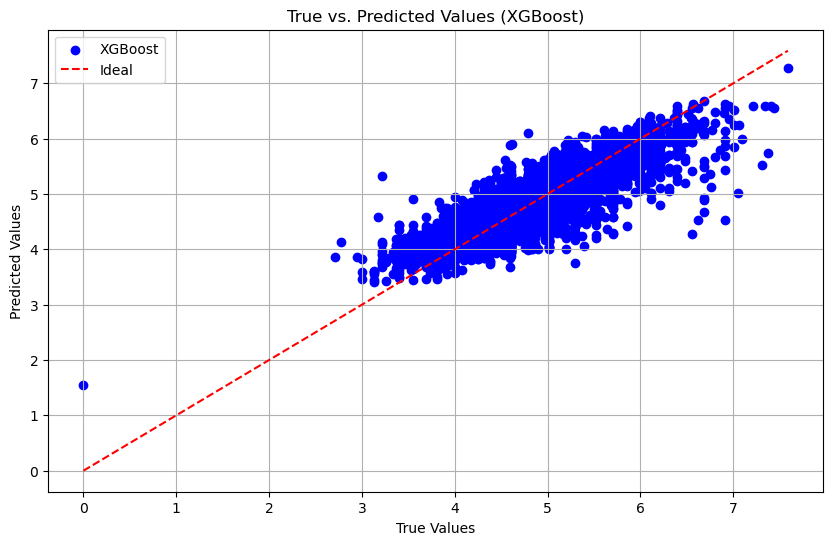

In [165]:
# Plot true vs. predicted values for Linear Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, xgb_pred, color='blue', label='XGBoost')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', label='Ideal')
plt.title('True vs. Predicted Values (XGBoost)')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

# ANN

In [166]:
# Define hyperparameter grid for ANN
param_grid_ann = {
    'ann__hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'ann__activation': ['relu', 'tanh', 'logistic'],
    'ann__alpha': [0.0001, 0.001, 0.01],
}

In [167]:
# Define ANN pipeline
pipeline_ann = Pipeline([
    ('preprocessor', preprocessor),
    ('ann', MLPRegressor(max_iter=500))
])

In [168]:
# Grid search for ANN
grid_search_ann = GridSearchCV(pipeline_ann, param_grid_ann, cv=5, scoring='neg_mean_squared_error')


# Prediction Train

In [169]:
# Convert column names to strings
X_train.columns = X_train.columns.astype(str)

In [170]:
# Fit the grid search object
grid_search_ann.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['room_type',
                                                                          'Borough']),
                                                                        ('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['0',
                                                                          '1'...
                                                                          'avg_lead_time',
                                                                          'min_lead_time',
                                                                          'min_airport_time',
                                                                          'avg_airport_time',
                                                                          'man_time',
                                                                          'bro_time',
                                                                          'que_time',
                                                                          'bnx_time',
                                                                          'sta_time',
                                                                          'nj_time'])])),
                                       ('ann', MLPRegressor(max_iter=500))]),
             param_grid={'ann__activation': ['relu', 'tanh', 'logistic'],
                         'ann__alpha': [0.0001, 0.001, 0.01],
                         'ann__hidden_layer_sizes': [(50,), (100,), (50, 50)]},
             scoring='neg_mean_squared_error')

In [171]:
# Get the best estimator
best_ann = grid_search_ann.best_estimator_

In [172]:
# Evaluate the model
ann_train_rmse, ann_train_r2 = evaluate_model(best_ann.predict(X_train), y_train)

In [173]:
# Print RMSE and R2 score for ANN
print("ANN: \nRMSE =", ann_train_rmse, "R2 =", ann_train_r2)

ANN: 
RMSE = 0.3780810691942245 R2 = 0.5053932308349539


# Prediction val

In [174]:
# Convert column names to strings
X_val.columns = X_val.columns.astype(str)

In [175]:
# Fit the grid search object
grid_search_ann.fit(X_val, y_val)

C:\Users\navab\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['room_type',
                                                                          'Borough']),
                                                                        ('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['0',
                                                                          '1'...
                                                                          'avg_lead_time',
                                                                          'min_lead_time',
                                                                          'min_airport_time',
                                                                          'avg_airport_time',
                                                                          'man_time',
                                                                          'bro_time',
                                                                          'que_time',
                                                                          'bnx_time',
                                                                          'sta_time',
                                                                          'nj_time'])])),
                                       ('ann', MLPRegressor(max_iter=500))]),
             param_grid={'ann__activation': ['relu', 'tanh', 'logistic'],
                         'ann__alpha': [0.0001, 0.001, 0.01],
                         'ann__hidden_layer_sizes': [(50,), (100,), (50, 50)]},
             scoring='neg_mean_squared_error')

In [176]:
# Get the best estimator
best_ann = grid_search_ann.best_estimator_

In [177]:
# Evaluate the model
ann_val_rmse, ann_val_r2 = evaluate_model(best_ann.predict(X_val), y_val)

In [178]:
# Print RMSE and R2 score for ANN
print("ANN: \nRMSE =", ann_val_rmse, "R2 =", ann_val_r2)

ANN: 
RMSE = 0.36788029629931757 R2 = 0.5492192341727702


# Prediction Test

In [179]:
# Convert column names to strings
X_test.columns = X_test.columns.astype(str)

In [180]:
# Fit the grid search object
grid_search_ann.fit(X_test, y_test)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['room_type',
                                                                          'Borough']),
                                                                        ('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['0',
                                                                          '1'...
                                                                          'avg_lead_time',
                                                                          'min_lead_time',
                                                                          'min_airport_time',
                                                                          'avg_airport_time',
                                                                          'man_time',
                                                                          'bro_time',
                                                                          'que_time',
                                                                          'bnx_time',
                                                                          'sta_time',
                                                                          'nj_time'])])),
                                       ('ann', MLPRegressor(max_iter=500))]),
             param_grid={'ann__activation': ['relu', 'tanh', 'logistic'],
                         'ann__alpha': [0.0001, 0.001, 0.01],
                         'ann__hidden_layer_sizes': [(50,), (100,), (50, 50)]},
             scoring='neg_mean_squared_error')

In [181]:
# Get the best estimator
best_ann = grid_search_ann.best_estimator_

In [182]:
# Evaluate the model
ann_test_rmse, ann_test_r2 = evaluate_model(best_ann.predict(X_test), y_test)

In [183]:
# Print RMSE and R2 score for ANN
print("ANN: \nRMSE =", ann_test_rmse, "R2 =", ann_test_r2)

ANN: 
RMSE = 0.3645379432371982 R2 = 0.5668729192849231


# SVR

In [184]:
param_grid_svr = {'svr__C': [0.1, 1.0, 10.0],
                 'svr__kernel': ['linear', 'rbf']}

In [185]:
pipeline_svr = Pipeline([
    ('preprocessor', preprocessor),
    ('svr', SVR())
])

In [186]:
grid_search_svr = GridSearchCV(pipeline_svr, param_grid_svr, cv=5, scoring='neg_mean_squared_error')

# Prediction Train

In [187]:
# Convert column names to strings
X_train.columns = X_train.columns.astype(str)

In [188]:
grid_search_svr.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['room_type',
                                                                          'Borough']),
                                                                        ('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['0',
                                                                          '1',
                                                                          '2',
                                                                          '3',
                                                                          '4',
                                                                          '5',
                                                                          'bathrooms',
                                                                          'bedrooms',
                                                                          'accommodates',
                                                                          'cleaning_fee',
                                                                          'avg_lead_time',
                                                                          'min_lead_time',
                                                                          'min_airport_time',
                                                                          'avg_airport_time',
                                                                          'man_time',
                                                                          'bro_time',
                                                                          'que_time',
                                                                          'bnx_time',
                                                                          'sta_time',
                                                                          'nj_time'])])),
                                       ('svr', SVR())]),
             param_grid={'svr__C': [0.1, 1.0, 10.0],
                         'svr__kernel': ['linear', 'rbf']},
             scoring='neg_mean_squared_error')

In [189]:
best_svr = grid_search_svr.best_estimator_

In [190]:
svr_pred = best_svr.predict(X_train)

In [191]:
svr_train_rmse, svr_train_r2 = evaluate_model(y_train, svr_pred)

In [192]:
print("SVR: \nRMSE =", svr_train_rmse, "R2 =", svr_train_r2)

SVR: 
RMSE = 0.34010209839101985 R2 = 0.7356437129969223


# Prediction val

In [193]:
# Convert column names to strings
X_val.columns = X_val.columns.astype(str)

In [194]:
grid_search_svr.fit(X_val, y_val)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['room_type',
                                                                          'Borough']),
                                                                        ('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['0',
                                                                          '1',
                                                                          '2',
                                                                          '3',
                                                                          '4',
                                                                          '5',
                                                                          'bathrooms',
                                                                          'bedrooms',
                                                                          'accommodates',
                                                                          'cleaning_fee',
                                                                          'avg_lead_time',
                                                                          'min_lead_time',
                                                                          'min_airport_time',
                                                                          'avg_airport_time',
                                                                          'man_time',
                                                                          'bro_time',
                                                                          'que_time',
                                                                          'bnx_time',
                                                                          'sta_time',
                                                                          'nj_time'])])),
                                       ('svr', SVR())]),
             param_grid={'svr__C': [0.1, 1.0, 10.0],
                         'svr__kernel': ['linear', 'rbf']},
             scoring='neg_mean_squared_error')

In [195]:
best_svr = grid_search_svr.best_estimator_

In [196]:
svr_pred = best_svr.predict(X_val)

In [197]:
svr_val_rmse, svr_val_r2 = evaluate_model(y_val, svr_pred)

In [198]:
print("SVR: \nRMSE =", svr_val_rmse, "R2 =", svr_val_r2)

SVR: 
RMSE = 0.3336428977796782 R2 = 0.7464886065606153


# Prediction test (log price)

In [199]:
# Convert column names to strings
X_test.columns = X_test.columns.astype(str)

In [200]:
grid_search_svr.fit(X_test, y_test)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['room_type',
                                                                          'Borough']),
                                                                        ('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['0',
                                                                          '1',
                                                                          '2',
                                                                          '3',
                                                                          '4',
                                                                          '5',
                                                                          'bathrooms',
                                                                          'bedrooms',
                                                                          'accommodates',
                                                                          'cleaning_fee',
                                                                          'avg_lead_time',
                                                                          'min_lead_time',
                                                                          'min_airport_time',
                                                                          'avg_airport_time',
                                                                          'man_time',
                                                                          'bro_time',
                                                                          'que_time',
                                                                          'bnx_time',
                                                                          'sta_time',
                                                                          'nj_time'])])),
                                       ('svr', SVR())]),
             param_grid={'svr__C': [0.1, 1.0, 10.0],
                         'svr__kernel': ['linear', 'rbf']},
             scoring='neg_mean_squared_error')

In [201]:
best_svr = grid_search_svr.best_estimator_

In [202]:
svr_pred = best_svr.predict(X_test)

In [203]:
svr_test_rmse, svr_test_r2 = evaluate_model(y_test, svr_pred)

In [204]:
print("SVR: \nRMSE =", svr_test_rmse, "R2 =", svr_test_r2)

SVR: 
RMSE = 0.3189918346908839 R2 = 0.7668833651162165


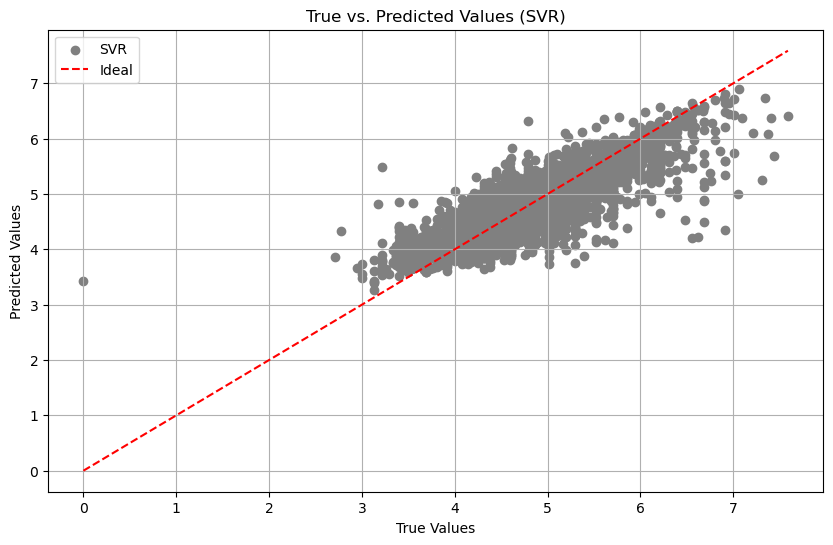

In [205]:
# Plot true vs. predicted values for Linear Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, svr_pred, color='grey', label='SVR')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', label='Ideal')
plt.title('True vs. Predicted Values (SVR)')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

# For normal price

# 1. Linear regression

# Train

In [ ]:
#data_cleaned['Price'] = np.exp(data_cleaned['log_price'])

In [253]:
# Define the Linear model
linear_model1 = LinearRegression()

In [254]:
X_train.columns = X_train.columns.astype(str)

In [255]:
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['room_type', 'Borough']),
                                ('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['0', '1', '2', '3', '4', '5', 'bathrooms',
                                  'bedrooms', 'accommodates', 'cleaning_fee',
                                  'avg_lead_time', 'min_lead_time',
                                  'min_airport_time', 'avg_airport_time',
                                  'man_time', 'bro_time', 'que_time',
                                  'bnx_time', 'sta_time', 'nj_time'])])

In [256]:
# Transform the training data using the fitted preprocessor
X_train_transformed = preprocessor.transform(X_train)

In [257]:
linear_model1.fit(X_train_transformed, np.exp(y_train)) 

LinearRegression()

In [264]:
# 1. Training dataset -
linear_pred_train1 = linear_model1.predict(X_train_transformed)

In [267]:
linear_train_np_rmse, linear_train_np_r2 = evaluate_model(np.exp(y_train), linear_pred_train1)

In [268]:
# Evaluating Performance
print("Linear Regression: \nRMSE =", linear_train_np_rmse, "\nR2 =", linear_train_np_r2)

Linear Regression: 
RMSE = 95.8973531889311 
R2 = 0.46342135123325756


# val 

In [269]:
X_val.columns = X_val.columns.astype(str)

In [270]:
preprocessor.fit(X_val)

ColumnTransformer(transformers=[('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['room_type', 'Borough']),
                                ('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['0', '1', '2', '3', '4', '5', 'bathrooms',
                                  'bedrooms', 'accommodates', 'cleaning_fee',
                                  'avg_lead_time', 'min_lead_time',
                                  'min_airport_time', 'avg_airport_time',
                                  'man_time', 'bro_time', 'que_time',
                                  'bnx_time', 'sta_time', 'nj_time'])])

In [271]:
# Transform the training data using the fitted preprocessor
X_val_transformed = preprocessor.transform(X_val)

In [272]:
linear_model1.fit(X_val_transformed, np.exp(y_val)) 

LinearRegression()

In [274]:
linear_pred_val1 = linear_model1.predict(X_val_transformed)

In [275]:
linear_val_np_rmse, linear_val_np_r2 = evaluate_model(np.exp(y_val), linear_pred_val1)

In [276]:
# Evaluating Performance
print("Linear Regression: \nRMSE =", linear_val_np_rmse, "\nR2 =", linear_val_np_r2)

Linear Regression: 
RMSE = 92.93664566042034 
R2 = 0.5108800972728177


# Test

In [277]:
X_test.columns = X_test.columns.astype(str)

In [278]:
preprocessor.fit(X_test)

ColumnTransformer(transformers=[('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['room_type', 'Borough']),
                                ('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['0', '1', '2', '3', '4', '5', 'bathrooms',
                                  'bedrooms', 'accommodates', 'cleaning_fee',
                                  'avg_lead_time', 'min_lead_time',
                                  'min_airport_time', 'avg_airport_time',
                                  'man_time', 'bro_time', 'que_time',
                                  'bnx_time', 'sta_time', 'nj_time'])])

In [279]:
# Transform the training data using the fitted preprocessor
X_test_transformed = preprocessor.transform(X_test)

In [280]:
linear_model1.fit(X_test_transformed, np.exp(y_test)) 

LinearRegression()

In [281]:
linear_pred_test1 = linear_model1.predict(X_test_transformed)

In [284]:
linear_test_np_rmse, linear_test_np_r2 = evaluate_model(np.exp(y_test), linear_pred_test1)

In [286]:
# Evaluating Performance
print("Linear Regression: \nRMSE =", linear_test_np_rmse, "\nR2 =", linear_test_np_r2)

Linear Regression: 
RMSE = 90.32534158262608 
R2 = 0.49789248352777615


# 2. Ridge

# Prediction Train

In [232]:
grid_search_ridge.fit(X_train, np.exp(y_train))

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['room_type',
                                                                          'Borough']),
                                                                        ('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['0',
                                                                          '1',
                                                                          '2',
                                                                          '3',
                                                                          '4',
                                                                          '5',
                                                                          'bathrooms',
                                                                          'bedrooms',
                                                                          'accommodates',
                                                                          'cleaning_fee',
                                                                          'avg_lead_time',
                                                                          'min_lead_time',
                                                                          'min_airport_time',
                                                                          'avg_airport_time',
                                                                          'man_time',
                                                                          'bro_time',
                                                                          'que_time',
                                                                          'bnx_time',
                                                                          'sta_time',
                                                                          'nj_time'])])),
                                       ('ridge', Ridge())]),
             param_grid={'ridge__alpha': [0.1, 1.0, 10.0]},
             scoring='neg_mean_squared_error')

In [233]:
#get the best estimators
best_ridge = grid_search_ridge.best_estimator_

In [234]:
# Predictions for Ridge and Lasso
ridge_pred = best_ridge.predict(X_train)

In [235]:
# Calculate RMSE and R2 for Ridge and Lasso
ridge_train_np_rmse, ridge_train_np_r2 = evaluate_model(np.exp(y_train), ridge_pred)

In [236]:
print("Ridge: \nRMSE =", ridge_train_np_rmse, "R2 =", ridge_train_np_r2)

Ridge: 
RMSE = 95.89678590663135 R2 = 0.4634276994933384


# Prediction val

In [237]:
grid_search_ridge.fit(X_val, np.exp(y_val))

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['room_type',
                                                                          'Borough']),
                                                                        ('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['0',
                                                                          '1',
                                                                          '2',
                                                                          '3',
                                                                          '4',
                                                                          '5',
                                                                          'bathrooms',
                                                                          'bedrooms',
                                                                          'accommodates',
                                                                          'cleaning_fee',
                                                                          'avg_lead_time',
                                                                          'min_lead_time',
                                                                          'min_airport_time',
                                                                          'avg_airport_time',
                                                                          'man_time',
                                                                          'bro_time',
                                                                          'que_time',
                                                                          'bnx_time',
                                                                          'sta_time',
                                                                          'nj_time'])])),
                                       ('ridge', Ridge())]),
             param_grid={'ridge__alpha': [0.1, 1.0, 10.0]},
             scoring='neg_mean_squared_error')

In [238]:
#get the best estimators
best_ridge = grid_search_ridge.best_estimator_

In [239]:
# Predictions for Ridge and Lasso
ridge_pred = best_ridge.predict(X_val)

In [240]:
# Calculate RMSE and R2 for Ridge and Lasso
ridge_val_np_rmse, ridge_val_np_r2 = evaluate_model(np.exp(y_val), ridge_pred)

In [241]:
print("Ridge: \nRMSE =", ridge_val_np_rmse, "R2 =", ridge_val_np_r2)

Ridge: 
RMSE = 92.93782345662746 R2 = 0.5108676998549305


# Predicted test

In [242]:
grid_search_ridge.fit(X_test, np.exp(y_test))

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['room_type',
                                                                          'Borough']),
                                                                        ('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['0',
                                                                          '1',
                                                                          '2',
                                                                          '3',
                                                                          '4',
                                                                          '5',
                                                                          'bathrooms',
                                                                          'bedrooms',
                                                                          'accommodates',
                                                                          'cleaning_fee',
                                                                          'avg_lead_time',
                                                                          'min_lead_time',
                                                                          'min_airport_time',
                                                                          'avg_airport_time',
                                                                          'man_time',
                                                                          'bro_time',
                                                                          'que_time',
                                                                          'bnx_time',
                                                                          'sta_time',
                                                                          'nj_time'])])),
                                       ('ridge', Ridge())]),
             param_grid={'ridge__alpha': [0.1, 1.0, 10.0]},
             scoring='neg_mean_squared_error')

In [243]:
#get the best estimators
best_ridge = grid_search_ridge.best_estimator_

In [244]:
# Predictions for Ridge and Lasso
ridge_pred = best_ridge.predict(X_test)

In [245]:
# Calculate RMSE and R2 for Ridge and Lasso
ridge_test_np_rmse, ridge_test_np_r2 = evaluate_model(np.exp(y_test), ridge_pred)

In [246]:
print("Ridge: \nRMSE =", ridge_val_np_rmse, "R2 =", ridge_val_np_r2)

Ridge: 
RMSE = 92.93782345662746 R2 = 0.5108676998549305


# 3. Lasso

# Prediction Train

In [287]:
grid_search_lasso.fit(X_train, np.exp(y_train))

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['room_type',
                                                                          'Borough']),
                                                                        ('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['0',
                                                                          '1',
                                                                          '2',
                                                                          '3',
                                                                          '4',
                                                                          '5',
                                                                          'bathrooms',
                                                                          'bedrooms',
                                                                          'accommodates',
                                                                          'cleaning_fee',
                                                                          'avg_lead_time',
                                                                          'min_lead_time',
                                                                          'min_airport_time',
                                                                          'avg_airport_time',
                                                                          'man_time',
                                                                          'bro_time',
                                                                          'que_time',
                                                                          'bnx_time',
                                                                          'sta_time',
                                                                          'nj_time'])])),
                                       ('lasso', Lasso())]),
             param_grid={'lasso__alpha': [0.1, 1.0, 10.0]},
             scoring='neg_mean_squared_error')

In [288]:
best_lasso = grid_search_lasso.best_estimator_

In [289]:
lasso_pred = best_lasso.predict(X_train)

In [290]:
lasso_train_np_rmse, lasso_train_np_r2 = evaluate_model(np.exp(y_train), lasso_pred)

In [291]:
print("Lasso: \nRMSE =", lasso_train_np_rmse, "R2 =", lasso_train_np_r2)

Lasso: 
RMSE = 95.99532700346555 R2 = 0.4623243968387518


# Prediction val

In [292]:
grid_search_lasso.fit(X_val, np.exp(y_val))

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['room_type',
                                                                          'Borough']),
                                                                        ('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['0',
                                                                          '1',
                                                                          '2',
                                                                          '3',
                                                                          '4',
                                                                          '5',
                                                                          'bathrooms',
                                                                          'bedrooms',
                                                                          'accommodates',
                                                                          'cleaning_fee',
                                                                          'avg_lead_time',
                                                                          'min_lead_time',
                                                                          'min_airport_time',
                                                                          'avg_airport_time',
                                                                          'man_time',
                                                                          'bro_time',
                                                                          'que_time',
                                                                          'bnx_time',
                                                                          'sta_time',
                                                                          'nj_time'])])),
                                       ('lasso', Lasso())]),
             param_grid={'lasso__alpha': [0.1, 1.0, 10.0]},
             scoring='neg_mean_squared_error')

In [293]:
best_lasso = grid_search_lasso.best_estimator_

In [294]:
lasso_pred = best_lasso.predict(X_val)

In [295]:
lasso_val_np_rmse, lasso_val_np_r2 = evaluate_model(np.exp(y_val), lasso_pred)

In [296]:
print("Lasso: \nRMSE =", lasso_val_np_rmse, "R2 =", lasso_val_np_r2)

Lasso: 
RMSE = 93.05160254965764 R2 = 0.5096693267058593


# Predicted test

In [297]:
grid_search_lasso.fit(X_test, np.exp(y_test))

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['room_type',
                                                                          'Borough']),
                                                                        ('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['0',
                                                                          '1',
                                                                          '2',
                                                                          '3',
                                                                          '4',
                                                                          '5',
                                                                          'bathrooms',
                                                                          'bedrooms',
                                                                          'accommodates',
                                                                          'cleaning_fee',
                                                                          'avg_lead_time',
                                                                          'min_lead_time',
                                                                          'min_airport_time',
                                                                          'avg_airport_time',
                                                                          'man_time',
                                                                          'bro_time',
                                                                          'que_time',
                                                                          'bnx_time',
                                                                          'sta_time',
                                                                          'nj_time'])])),
                                       ('lasso', Lasso())]),
             param_grid={'lasso__alpha': [0.1, 1.0, 10.0]},
             scoring='neg_mean_squared_error')

In [298]:
best_lasso = grid_search_lasso.best_estimator_

In [299]:
lasso_pred = best_lasso.predict(X_test)

In [312]:
lasso_test_np_rmse, lasso_test_np_r2 = evaluate_model(np.exp(y_test), lasso_pred)

In [313]:
print("Lasso: \nRMSE =", lasso_test_np_rmse, "R2 =", lasso_test_np_r2)

Lasso: 
RMSE = 90.42635684655166 R2 = 0.49676879256725714


# 4. Random Forest

# Prediction Train

In [302]:
grid_search_random_forest.fit(X_train, np.exp(y_train))

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['room_type',
                                                                          'Borough']),
                                                                        ('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['0',
                                                                          '1'...
                                                                          'bedrooms',
                                                                          'accommodates',
                                                                          'cleaning_fee',
                                                                          'avg_lead_time',
                                                                          'min_lead_time',
                                                                          'min_airport_time',
                                                                          'avg_airport_time',
                                                                          'man_time',
                                                                          'bro_time',
                                                                          'que_time',
                                                                          'bnx_time',
                                                                          'sta_time',
                                                                          'nj_time'])])),
                                       ('random_forest',
                                        RandomForestRegressor())]),
             param_grid={'random_forest__max_depth': [1, 2, 3, 4],
                         'random_forest__n_estimators': [50, 100, 150]},
             scoring='neg_mean_squared_error')

In [303]:
best_random_forest = grid_search_random_forest.best_estimator_

In [304]:
rf_pred = best_random_forest.predict(X_train)

In [305]:
rf_train_np_rmse, rf_train_np_r2 = evaluate_model(np.exp(y_train), rf_pred)

In [306]:
print("Random Forest: \nRMSE =", rf_train_np_rmse, "R2 =", rf_train_np_r2)

Random Forest: 
RMSE = 93.41767444878269 R2 = 0.4908118949943776


# Prediction val

In [307]:
grid_search_random_forest.fit(X_val, np.exp(y_val))

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['room_type',
                                                                          'Borough']),
                                                                        ('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['0',
                                                                          '1'...
                                                                          'bedrooms',
                                                                          'accommodates',
                                                                          'cleaning_fee',
                                                                          'avg_lead_time',
                                                                          'min_lead_time',
                                                                          'min_airport_time',
                                                                          'avg_airport_time',
                                                                          'man_time',
                                                                          'bro_time',
                                                                          'que_time',
                                                                          'bnx_time',
                                                                          'sta_time',
                                                                          'nj_time'])])),
                                       ('random_forest',
                                        RandomForestRegressor())]),
             param_grid={'random_forest__max_depth': [1, 2, 3, 4],
                         'random_forest__n_estimators': [50, 100, 150]},
             scoring='neg_mean_squared_error')

In [308]:
best_random_forest = grid_search_random_forest.best_estimator_

In [309]:
rf_pred = best_random_forest.predict(X_val)

In [310]:
rf_val_np_rmse, rf_val_np_r2 = evaluate_model(np.exp(y_val), rf_pred)

In [311]:
print("Random Forest: \nRMSE =", rf_val_np_rmse, "R2 =", rf_val_np_r2)

Random Forest: 
RMSE = 87.01298763279082 R2 = 0.5712446924795399


# Prediction Test

In [314]:
grid_search_random_forest.fit(X_test, np.exp(y_test))

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['room_type',
                                                                          'Borough']),
                                                                        ('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['0',
                                                                          '1'...
                                                                          'bedrooms',
                                                                          'accommodates',
                                                                          'cleaning_fee',
                                                                          'avg_lead_time',
                                                                          'min_lead_time',
                                                                          'min_airport_time',
                                                                          'avg_airport_time',
                                                                          'man_time',
                                                                          'bro_time',
                                                                          'que_time',
                                                                          'bnx_time',
                                                                          'sta_time',
                                                                          'nj_time'])])),
                                       ('random_forest',
                                        RandomForestRegressor())]),
             param_grid={'random_forest__max_depth': [1, 2, 3, 4],
                         'random_forest__n_estimators': [50, 100, 150]},
             scoring='neg_mean_squared_error')

In [315]:
best_random_forest = grid_search_random_forest.best_estimator_

In [316]:
rf_pred = best_random_forest.predict(X_test)

In [317]:
rf_test_np_rmse, rf_test_np_r2 = evaluate_model(np.exp(y_test), rf_pred)

In [318]:
print("Random Forest: \nRMSE =", rf_test_np_rmse, "R2 =", rf_test_np_r2)

Random Forest: 
RMSE = 83.77703527702738 R2 = 0.5680559736065185


# 5. X Gradient Boosting

# Prediction Train

In [319]:
grid_search_xgb.fit(X_train, np.exp(y_train))

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['room_type',
                                                                          'Borough']),
                                                                        ('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['0',
                                                                          '1'...
                                                     max_delta_step=None,
                                                     max_depth=None,
                                                     max_leaves=None,
                                                     min_child_weight=None,
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     multi_strategy=None,
                                                     n_estimators=None,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     random_state=None, ...))]),
             param_grid={'xgb__learning_rate': [0.05, 0.1, 0.2],
                         'xgb__max_depth': [3, 5, 7],
                         'xgb__n_estimators': [50, 100, 150]},
             scoring='neg_mean_squared_error')

In [320]:
best_xgb = grid_search_xgb.best_estimator_

In [321]:
xgb_pred = best_xgb.predict(X_train)

In [322]:
xgb_train_np_rmse, xgb_train_np_r2 = evaluate_model(np.exp(y_train), xgb_pred)

In [323]:
print("XGBoost: \nRMSE =", xgb_train_np_rmse, "R2 =", xgb_train_np_r2)

XGBoost: 
RMSE = 80.83304934889647 R2 = 0.6187603421063224


# Prediction val

In [324]:
grid_search_xgb.fit(X_val, np.exp(y_val))

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['room_type',
                                                                          'Borough']),
                                                                        ('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['0',
                                                                          '1'...
                                                     max_delta_step=None,
                                                     max_depth=None,
                                                     max_leaves=None,
                                                     min_child_weight=None,
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     multi_strategy=None,
                                                     n_estimators=None,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     random_state=None, ...))]),
             param_grid={'xgb__learning_rate': [0.05, 0.1, 0.2],
                         'xgb__max_depth': [3, 5, 7],
                         'xgb__n_estimators': [50, 100, 150]},
             scoring='neg_mean_squared_error')

In [325]:
best_xgb = grid_search_xgb.best_estimator_

In [326]:
xgb_pred = best_xgb.predict(X_val)

In [327]:
xgb_val_np_rmse, xgb_val_np_r2 = evaluate_model(np.exp(y_val), xgb_pred)

In [328]:
print("XGBoost: \nRMSE =", xgb_val_np_rmse, "R2 =", xgb_val_np_r2)

XGBoost: 
RMSE = 74.16607786550288 R2 = 0.6885043591115085


# Prediction Test

In [329]:
grid_search_xgb.fit(X_test, np.exp(y_test))

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['room_type',
                                                                          'Borough']),
                                                                        ('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['0',
                                                                          '1'...
                                                     max_delta_step=None,
                                                     max_depth=None,
                                                     max_leaves=None,
                                                     min_child_weight=None,
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     multi_strategy=None,
                                                     n_estimators=None,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     random_state=None, ...))]),
             param_grid={'xgb__learning_rate': [0.05, 0.1, 0.2],
                         'xgb__max_depth': [3, 5, 7],
                         'xgb__n_estimators': [50, 100, 150]},
             scoring='neg_mean_squared_error')

In [330]:
best_xgb = grid_search_xgb.best_estimator_

In [331]:
xgb_pred = best_xgb.predict(X_test)

In [332]:
xgb_test_np_rmse, xgb_test_np_r2 = evaluate_model(np.exp(y_test), xgb_pred)

In [333]:
print("XGBoost: \nRMSE =", xgb_test_np_rmse, "R2 =", xgb_test_np_r2)

XGBoost: 
RMSE = 68.18253681651818 R2 = 0.713896079607504


# 6. ANN

# Prediction train

In [336]:
# Fit the grid search object
grid_search_ann.fit(X_train, np.exp(y_train))

C:\Users\navab\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\navab\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\navab\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\navab\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\navab\anaconda3\Lib\site-packages\sklearn\neural_network\_multi

C:\Users\navab\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\navab\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\navab\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\navab\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\navab\anaconda3\Lib\site-packages\sklearn\neural_network\_multi

C:\Users\navab\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\navab\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\navab\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\navab\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\navab\anaconda3\Lib\site-packages\sklearn\neural_network\_multi

C:\Users\navab\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\navab\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\navab\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\navab\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\navab\anaconda3\Lib\site-packages\sklearn\neural_network\_multi

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['room_type',
                                                                          'Borough']),
                                                                        ('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['0',
                                                                          '1'...
                                                                          'avg_lead_time',
                                                                          'min_lead_time',
                                                                          'min_airport_time',
                                                                          'avg_airport_time',
                                                                          'man_time',
                                                                          'bro_time',
                                                                          'que_time',
                                                                          'bnx_time',
                                                                          'sta_time',
                                                                          'nj_time'])])),
                                       ('ann', MLPRegressor(max_iter=500))]),
             param_grid={'ann__activation': ['relu', 'tanh', 'logistic'],
                         'ann__alpha': [0.0001, 0.001, 0.01],
                         'ann__hidden_layer_sizes': [(50,), (100,), (50, 50)]},
             scoring='neg_mean_squared_error')

In [337]:
# Get the best estimator
best_ann = grid_search_ann.best_estimator_

In [338]:
# Evaluate the model
ann_train_np_rmse, ann_train_np_r2 = evaluate_model(best_ann.predict(X_train), np.exp(y_train))

In [339]:
# Print RMSE and R2 score for ANN
print("ANN: \nRMSE =", ann_train_np_rmse, "R2 =", ann_train_np_r2)

ANN: 
RMSE = 86.34240728472753 R2 = 0.19471599863258782


# Prediction val

In [340]:
# Fit the grid search object
grid_search_ann.fit(X_val, np.exp(y_val))

C:\Users\navab\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\navab\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\navab\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\navab\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\navab\anaconda3\Lib\site-packages\sklearn\neural_network\_multi

C:\Users\navab\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\navab\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\navab\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\navab\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\navab\anaconda3\Lib\site-packages\sklearn\neural_network\_multi

C:\Users\navab\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\navab\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\navab\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\navab\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\navab\anaconda3\Lib\site-packages\sklearn\neural_network\_multi

C:\Users\navab\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\navab\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\navab\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\navab\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\navab\anaconda3\Lib\site-packages\sklearn\neural_network\_multi

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['room_type',
                                                                          'Borough']),
                                                                        ('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['0',
                                                                          '1'...
                                                                          'avg_lead_time',
                                                                          'min_lead_time',
                                                                          'min_airport_time',
                                                                          'avg_airport_time',
                                                                          'man_time',
                                                                          'bro_time',
                                                                          'que_time',
                                                                          'bnx_time',
                                                                          'sta_time',
                                                                          'nj_time'])])),
                                       ('ann', MLPRegressor(max_iter=500))]),
             param_grid={'ann__activation': ['relu', 'tanh', 'logistic'],
                         'ann__alpha': [0.0001, 0.001, 0.01],
                         'ann__hidden_layer_sizes': [(50,), (100,), (50, 50)]},
             scoring='neg_mean_squared_error')

In [341]:
# Get the best estimator
best_ann = grid_search_ann.best_estimator_

In [342]:
# Evaluate the model
ann_val_np_rmse, ann_val_np_r2 = evaluate_model(best_ann.predict(X_val), np.exp(y_val))

In [343]:
# Print RMSE and R2 score for ANN
print("ANN: \nRMSE =", ann_val_np_rmse, "R2 =", ann_val_np_r2)

ANN: 
RMSE = 84.50659066985257 R2 = 0.29774076481103273


# Prediction Test

In [344]:
# Fit the grid search object
grid_search_ann.fit(X_test, np.exp(y_test))

C:\Users\navab\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\navab\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\navab\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\navab\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\navab\anaconda3\Lib\site-packages\sklearn\neural_network\_multi

C:\Users\navab\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\navab\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\navab\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\navab\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\navab\anaconda3\Lib\site-packages\sklearn\neural_network\_multi

C:\Users\navab\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\navab\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\navab\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\navab\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\navab\anaconda3\Lib\site-packages\sklearn\neural_network\_multi

C:\Users\navab\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\navab\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\navab\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\navab\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\navab\anaconda3\Lib\site-packages\sklearn\neural_network\_multi

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['room_type',
                                                                          'Borough']),
                                                                        ('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['0',
                                                                          '1'...
                                                                          'avg_lead_time',
                                                                          'min_lead_time',
                                                                          'min_airport_time',
                                                                          'avg_airport_time',
                                                                          'man_time',
                                                                          'bro_time',
                                                                          'que_time',
                                                                          'bnx_time',
                                                                          'sta_time',
                                                                          'nj_time'])])),
                                       ('ann', MLPRegressor(max_iter=500))]),
             param_grid={'ann__activation': ['relu', 'tanh', 'logistic'],
                         'ann__alpha': [0.0001, 0.001, 0.01],
                         'ann__hidden_layer_sizes': [(50,), (100,), (50, 50)]},
             scoring='neg_mean_squared_error')

In [345]:
# Get the best estimator
best_ann = grid_search_ann.best_estimator_

In [346]:
# Evaluate the model
ann_test_np_rmse, ann_test_np_r2 = evaluate_model(best_ann.predict(X_test), np.exp(y_test))

In [347]:
# Print RMSE and R2 score for ANN
print("ANN: \nRMSE =", ann_test_np_rmse, "R2 =", ann_test_np_r2)

ANN: 
RMSE = 80.37391119787735 R2 = 0.3157751624717988


# SVR

# Prediction train

In [348]:
grid_search_svr.fit(X_train, np.exp(y_train))

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['room_type',
                                                                          'Borough']),
                                                                        ('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['0',
                                                                          '1',
                                                                          '2',
                                                                          '3',
                                                                          '4',
                                                                          '5',
                                                                          'bathrooms',
                                                                          'bedrooms',
                                                                          'accommodates',
                                                                          'cleaning_fee',
                                                                          'avg_lead_time',
                                                                          'min_lead_time',
                                                                          'min_airport_time',
                                                                          'avg_airport_time',
                                                                          'man_time',
                                                                          'bro_time',
                                                                          'que_time',
                                                                          'bnx_time',
                                                                          'sta_time',
                                                                          'nj_time'])])),
                                       ('svr', SVR())]),
             param_grid={'svr__C': [0.1, 1.0, 10.0],
                         'svr__kernel': ['linear', 'rbf']},
             scoring='neg_mean_squared_error')

In [349]:
best_svr = grid_search_svr.best_estimator_

In [351]:
svr_pred = best_svr.predict(X_train)

In [352]:
svr_train_np_rmse, svr_train_np_r2 = evaluate_model(np.exp(y_train), svr_pred)

In [353]:
print("SVR: \nRMSE =", svr_train_np_rmse, "R2 =", svr_train_np_r2)

SVR: 
RMSE = 96.53280661559309 R2 = 0.45628662994005953


# Prediction val

In [354]:
grid_search_svr.fit(X_val, np.exp(y_val))

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['room_type',
                                                                          'Borough']),
                                                                        ('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['0',
                                                                          '1',
                                                                          '2',
                                                                          '3',
                                                                          '4',
                                                                          '5',
                                                                          'bathrooms',
                                                                          'bedrooms',
                                                                          'accommodates',
                                                                          'cleaning_fee',
                                                                          'avg_lead_time',
                                                                          'min_lead_time',
                                                                          'min_airport_time',
                                                                          'avg_airport_time',
                                                                          'man_time',
                                                                          'bro_time',
                                                                          'que_time',
                                                                          'bnx_time',
                                                                          'sta_time',
                                                                          'nj_time'])])),
                                       ('svr', SVR())]),
             param_grid={'svr__C': [0.1, 1.0, 10.0],
                         'svr__kernel': ['linear', 'rbf']},
             scoring='neg_mean_squared_error')

In [355]:
best_svr = grid_search_svr.best_estimator_

In [356]:
svr_pred = best_svr.predict(X_val)

In [357]:
svr_val_np_rmse, svr_val_np_r2 = evaluate_model(np. exp(y_val), svr_pred)

In [358]:
print("SVR: \nRMSE =", svr_val_np_rmse, "R2 =", svr_val_np_r2)

SVR: 
RMSE = 99.10864116699966 R2 = 0.4437572141666458


# Prediction Test

In [359]:
grid_search_svr.fit(X_test, np.exp(y_test))

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['room_type',
                                                                          'Borough']),
                                                                        ('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['0',
                                                                          '1',
                                                                          '2',
                                                                          '3',
                                                                          '4',
                                                                          '5',
                                                                          'bathrooms',
                                                                          'bedrooms',
                                                                          'accommodates',
                                                                          'cleaning_fee',
                                                                          'avg_lead_time',
                                                                          'min_lead_time',
                                                                          'min_airport_time',
                                                                          'avg_airport_time',
                                                                          'man_time',
                                                                          'bro_time',
                                                                          'que_time',
                                                                          'bnx_time',
                                                                          'sta_time',
                                                                          'nj_time'])])),
                                       ('svr', SVR())]),
             param_grid={'svr__C': [0.1, 1.0, 10.0],
                         'svr__kernel': ['linear', 'rbf']},
             scoring='neg_mean_squared_error')

In [360]:
best_svr = grid_search_svr.best_estimator_

In [361]:
svr_pred = best_svr.predict(X_test)

In [362]:
svr_test_np_rmse, svr_test_np_r2 = evaluate_model(np. exp(y_test), svr_pred)

In [363]:
print("SVR: \nRMSE =", svr_test_np_rmse, "R2 =", svr_test_np_r2)

SVR: 
RMSE = 93.36339308481574 R2 = 0.4635481453398915


In [365]:
data_cleaned['Price'] = np.exp(data_cleaned['log_price'])

C:\Users\navab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\navab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\navab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\navab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

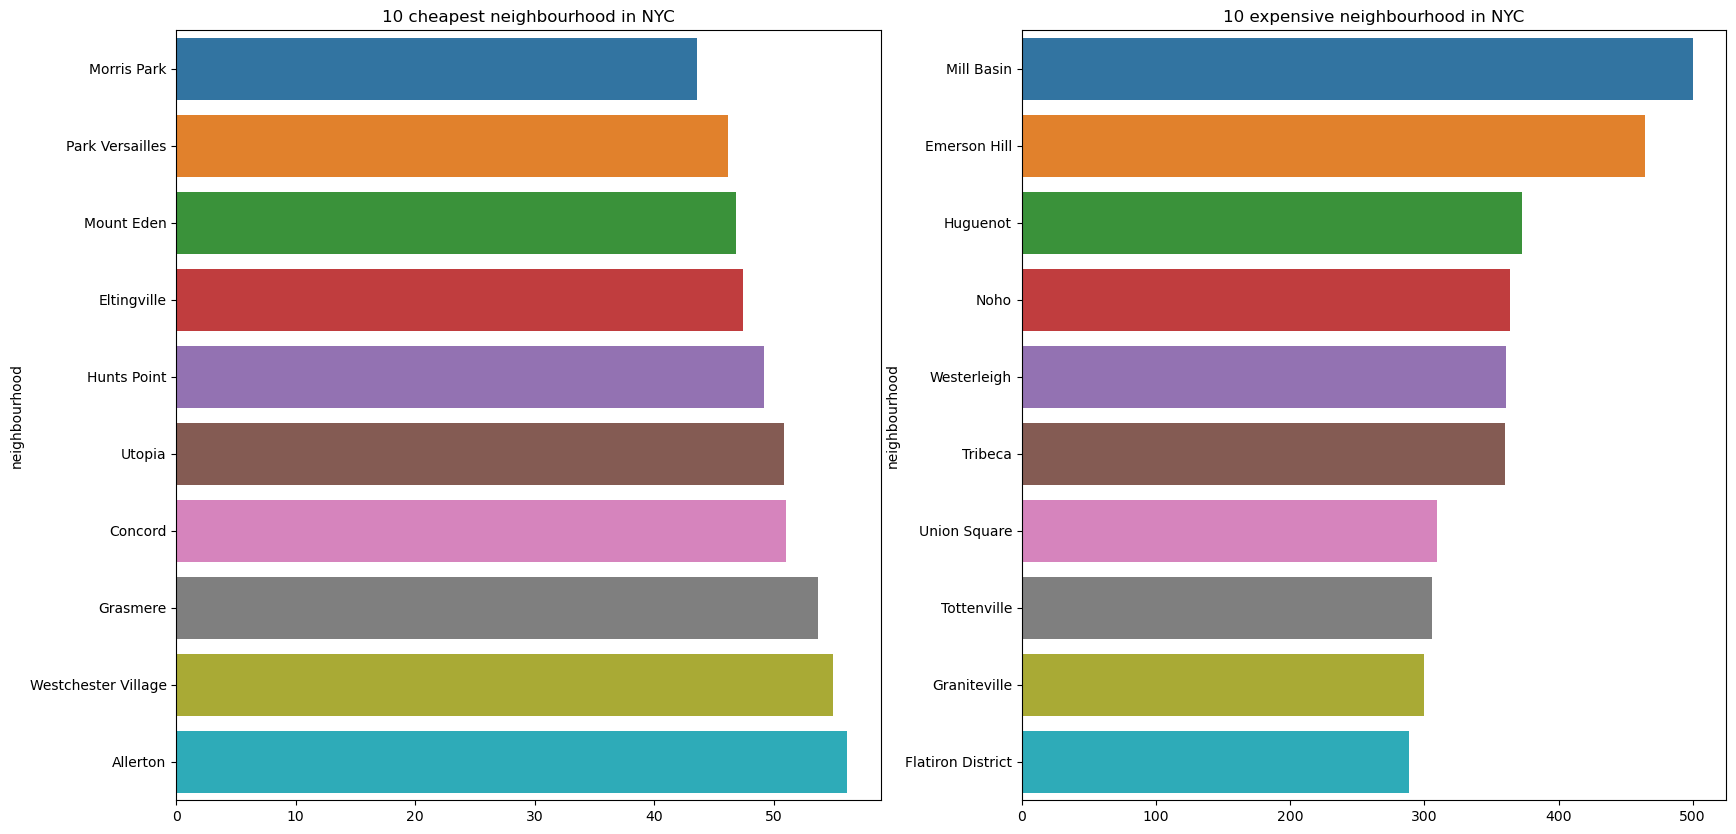

In [366]:
#Top 10 expensive & Cheapest neighbourhood in NYC
a = data_cleaned.groupby('neighbourhood')['Price'].mean().sort_values(ascending=True).head(10)
b = data_cleaned.groupby('neighbourhood')['Price'].mean().sort_values(ascending=False).head(10)
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(121)
sns.barplot(y=a.index, x=a.values, ax=ax1)
ax1.set_title('10 cheapest neighbourhood in NYC')
ax2 = fig.add_subplot(122)
sns.barplot(y=b.index, x=b.values, ax=ax2)
ax2.set_title('10 expensive neighbourhood in NYC')
plt.show()

C:\Users\navab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\navab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\navab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\navab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

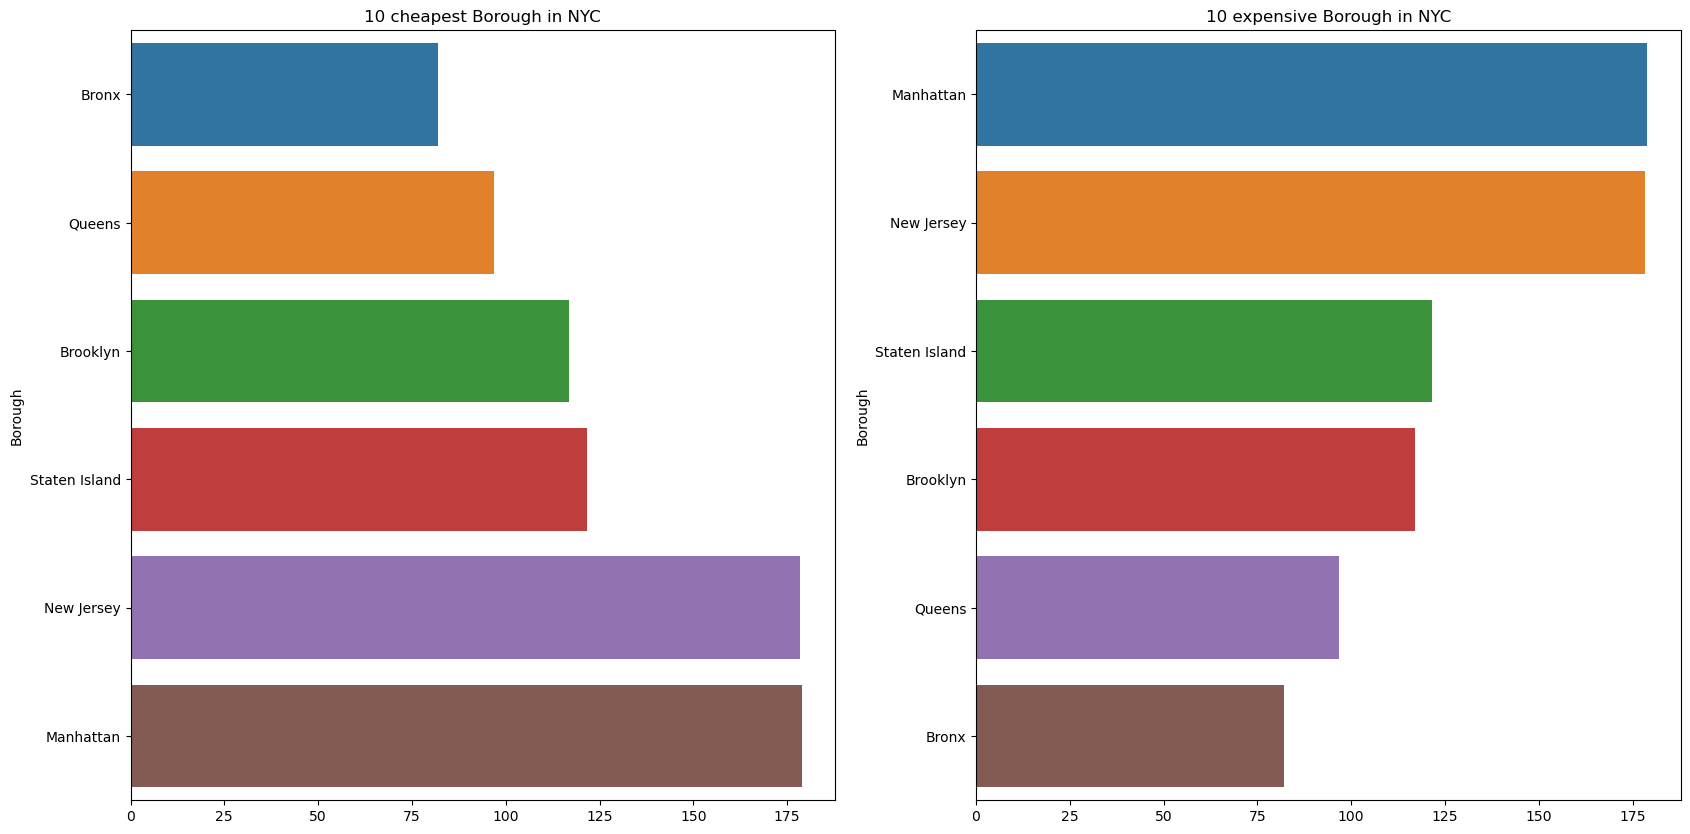

In [367]:
#Top 10 expensive & Cheapest Borough in NYC
a = data_cleaned.groupby('Borough')['Price'].mean().sort_values(ascending=True).head(10)
b = data_cleaned.groupby('Borough')['Price'].mean().sort_values(ascending=False).head(10)
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(121)
sns.barplot(y=a.index, x=a.values, ax=ax1)
ax1.set_title('10 cheapest Borough in NYC')
ax2 = fig.add_subplot(122)
sns.barplot(y=b.index, x=b.values, ax=ax2)
ax2.set_title('10 expensive Borough in NYC')
plt.show()

Text(0.5, 0, 'Type')

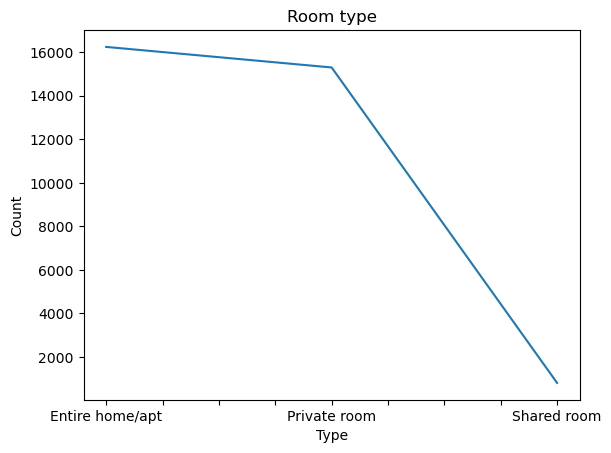

In [368]:
#Ploting room count
data_cleaned['room_type'].value_counts().plot(kind='line')
plt.title('Room type')
plt.ylabel('Count')
plt.xlabel('Type')

C:\Users\navab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\navab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\navab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0, 0.5, 'Price')

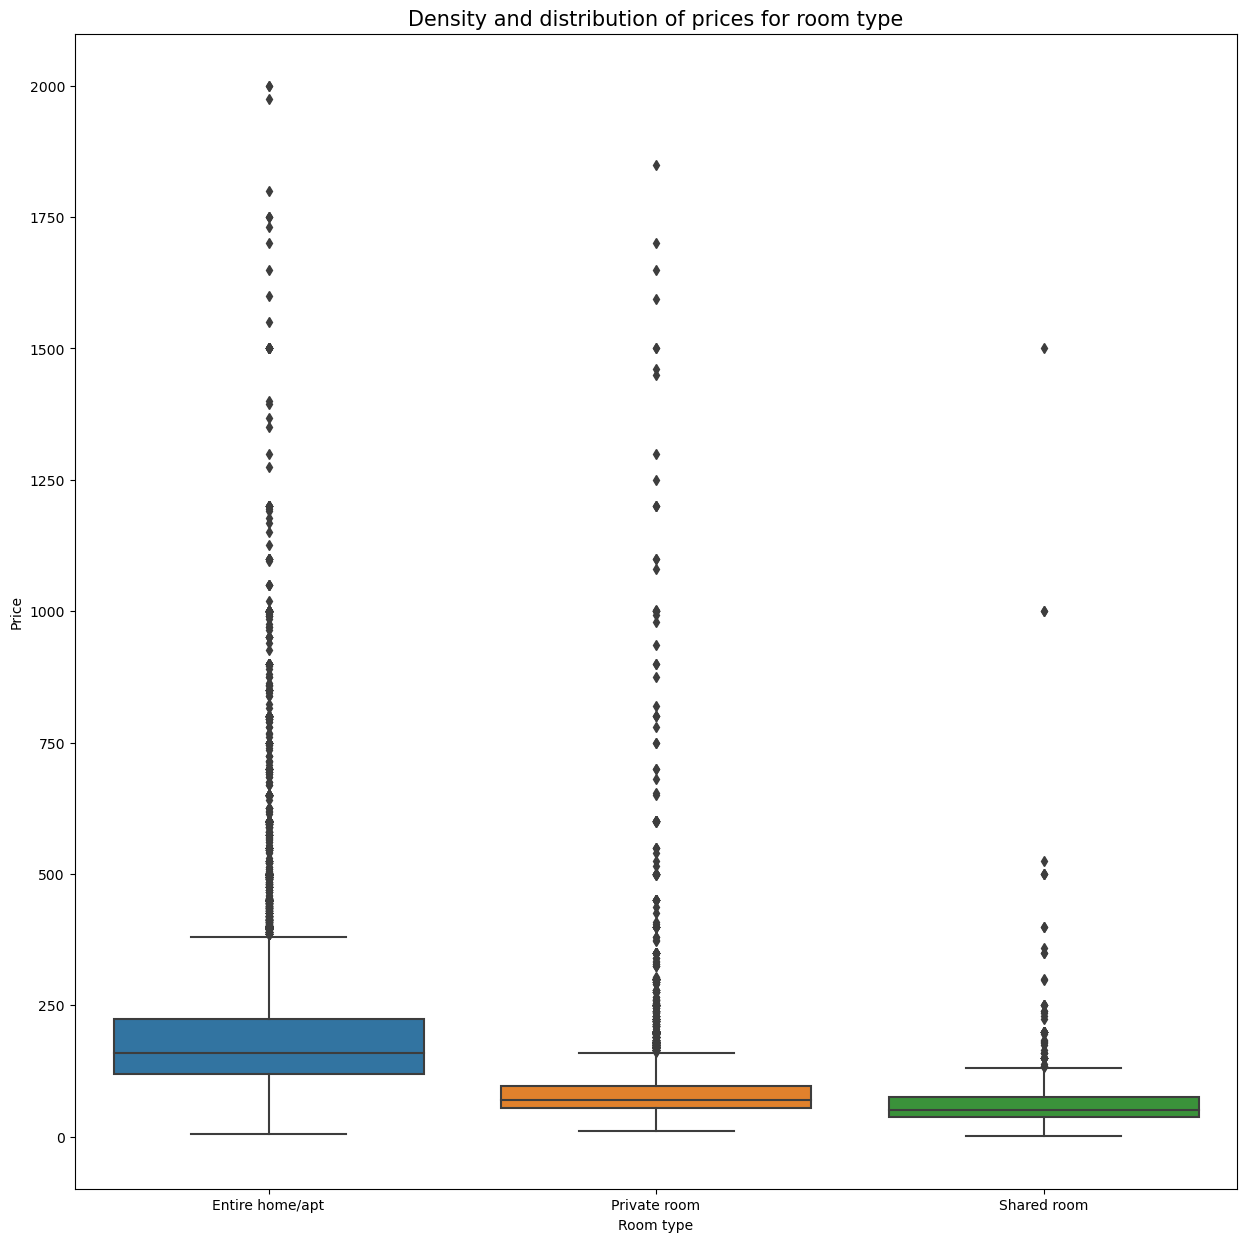

In [369]:
#Box Plot to view outliers
plt.figure(figsize=(15,15))
sns.boxplot(data=data_cleaned, x='room_type', y='Price')
plt.title('Density and distribution of prices for room type', fontsize=15)
plt.xlabel('Room type')
plt.ylabel("Price")

C:\Users\navab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\navab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\navab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\navab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

Text(0.5, 1.0, 'Room type vs Price vs Instantly bookable')

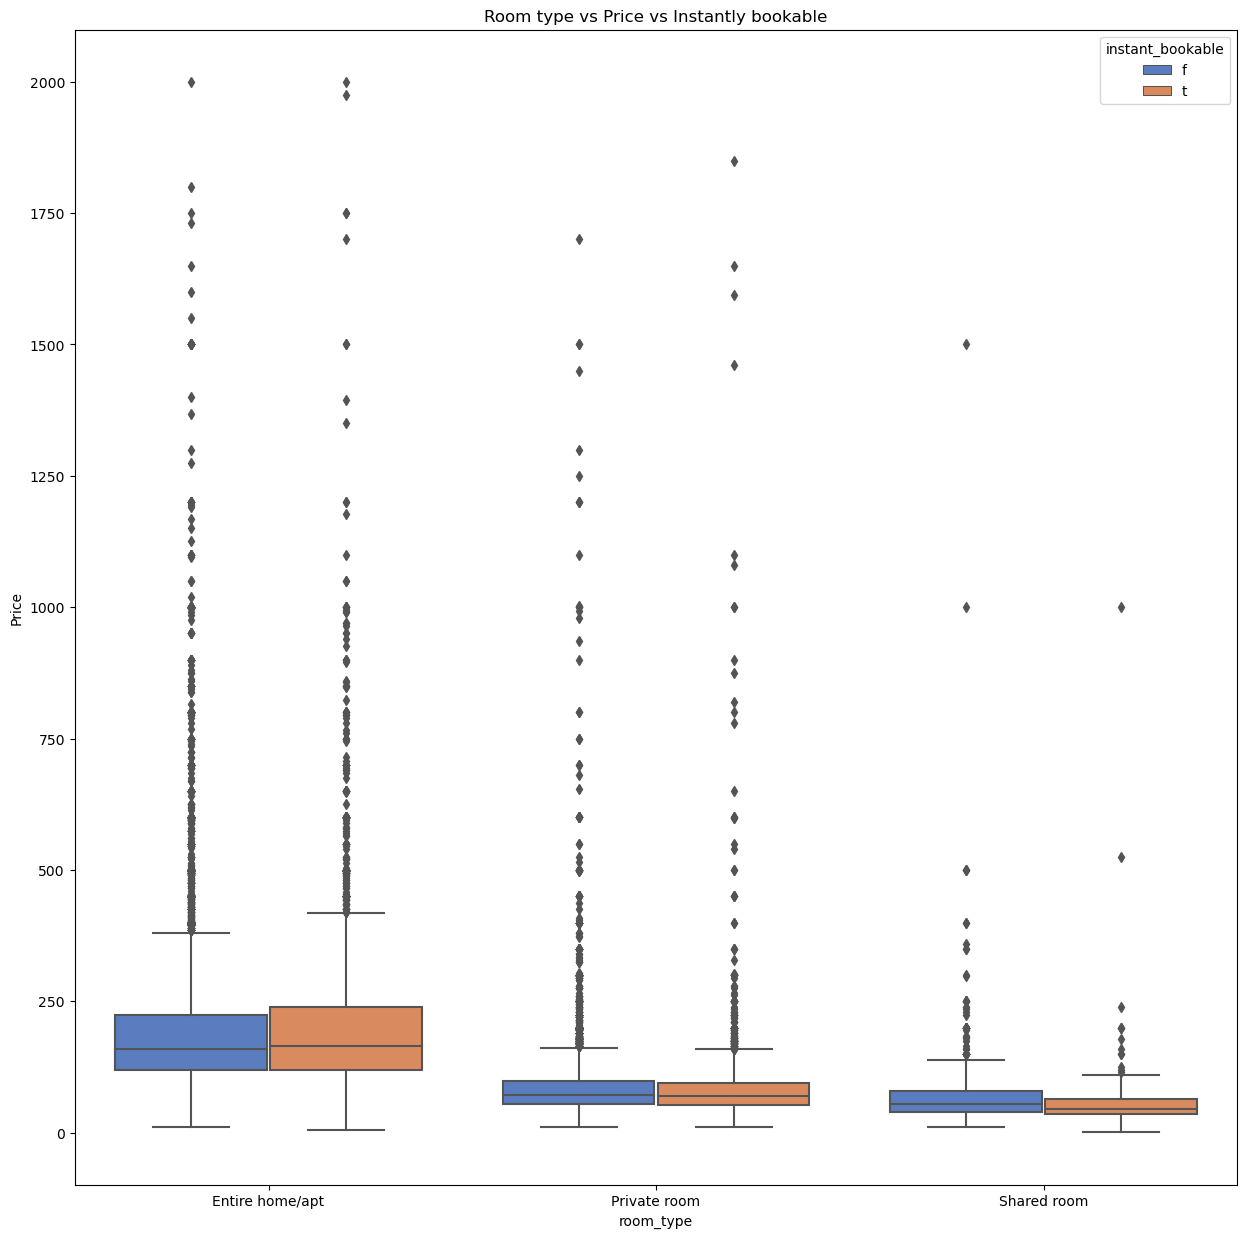

In [370]:
#correlating instant bookable rooms with price
plt.figure(figsize=(15,15))
sns.boxplot(x='room_type',y='Price', hue="instant_bookable", data=data_cleaned, palette='muted')
plt.title("Room type vs Price vs Instantly bookable")

C:\Users\navab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\navab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\navab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\navab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

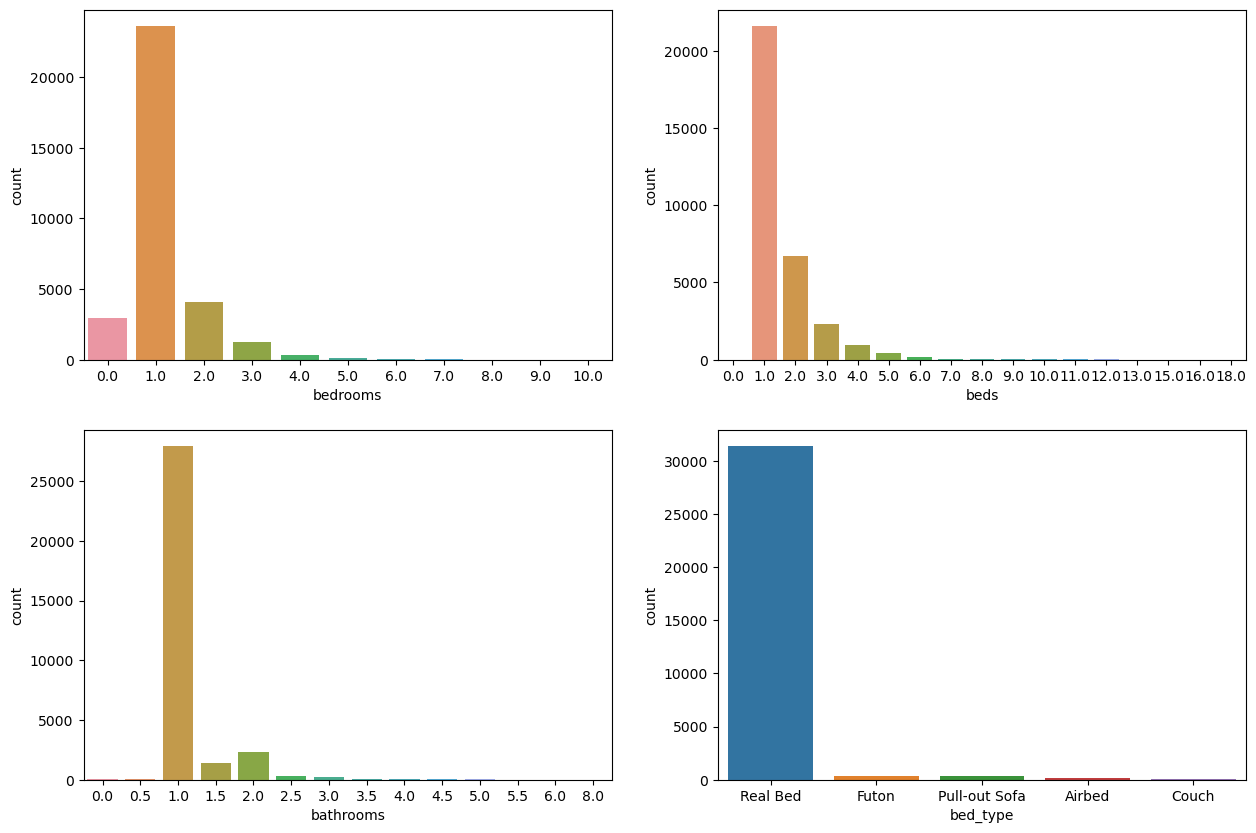

In [371]:
#plotting the count of bedrooms, beds and bathrooms.
a=['bedrooms','beds','bathrooms','bed_type']
fig, axes = plt.subplots(2,2, figsize=(15,10))
axes = [ax for axes_row in axes for ax in axes_row]
for i, c in enumerate(a):
    f = sns.countplot(x=data_cleaned[c], data=data_cleaned, ax=axes[i])

C:\Users\navab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\navab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\navab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'Number of accomodates vs Average Price')

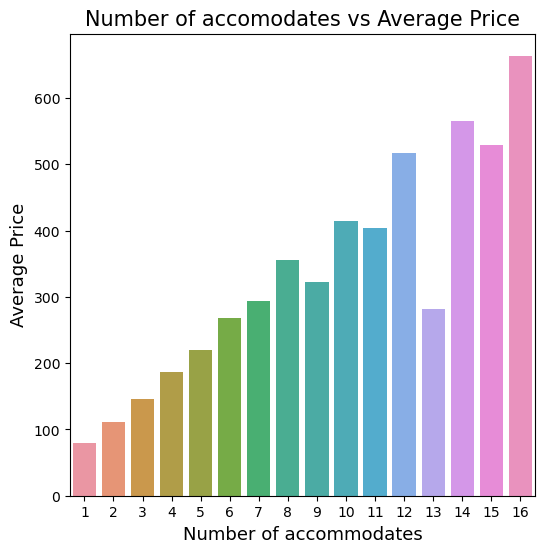

In [372]:
#plotting the number of accomodates vs mean price
a = data_cleaned.groupby('accommodates')['Price'].mean()
fig = plt.figure(figsize=(6,6))
sns.barplot(y=a.values, x=a.index)
plt.xlabel("Number of accommodates", size=13)
plt.ylabel("Average Price", size=13)
plt.title("Number of accomodates vs Average Price",size=15)